In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
pd.pandas.set_option('display.max_rows',None)

In [13]:
!gdown 1kC0TvGUHIB9U2itHGtBjunJPSJ1H0WGr
!gdown 1pBXVTuPrAIzFPoWlNXHYrjl8_D5sDL60

Downloading...
From: https://drive.google.com/uc?id=1kC0TvGUHIB9U2itHGtBjunJPSJ1H0WGr
To: /content/train.csv
100% 461k/461k [00:00<00:00, 4.99MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pBXVTuPrAIzFPoWlNXHYrjl8_D5sDL60
To: /content/test.csv
100% 451k/451k [00:00<00:00, 4.88MB/s]


In [ ]:
df_train = pd.read_csv('train.csv').set_index('Id')
df_test =pd.read_csv('test.csv').set_index('Id')

In [ ]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [ ]:
df_train.shape

(1460, 80)

identify the categorical and numerical features

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
cat = df_train.select_dtypes('object').columns
cat

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
num = df_train.select_dtypes(['float64','int64']).columns
num

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
disc = []
for col in num:
  if len(df_train[col].unique()) <= 25:
    disc.append(col)

In [ ]:
dsc = [col for col in num if len(df_train[col].unique()) <= 25 ]
dsc

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
len(disc)

18

In [ ]:
disc

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
cont = []
for col in num:
  if col not in disc:
    cont.append(col)

In [ ]:
len(cont)

19

missing values

In [ ]:
feat_miss = [col for col in df_train.columns if df_train[col].isnull().any()]
feat_miss

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
feat_misst = [col for col in df_test.columns if df_test[col].isnull().any()]
feat_misst

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

one observation is that some features in the test set are having missing values yet they are not in the train set

In [ ]:
dfc = df_train[cat]
cat_miss = [col for col in dfc.columns if dfc[col].isnull().any()]

In [ ]:
for col in cat_miss:
  print(col, np.round(df_train[col].isnull().mean(), 4))

Alley 0.9377
MasVnrType 0.0055
BsmtQual 0.0253
BsmtCond 0.0253
BsmtExposure 0.026
BsmtFinType1 0.0253
BsmtFinType2 0.026
Electrical 0.0007
FireplaceQu 0.4726
GarageType 0.0555
GarageFinish 0.0555
GarageQual 0.0555
GarageCond 0.0555
PoolQC 0.9952
Fence 0.8075
MiscFeature 0.963


In [ ]:
cont_miss = [col for col in feat_miss if col in cont]
cont_miss

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

Analysing the impact of the misisng values on the target variable

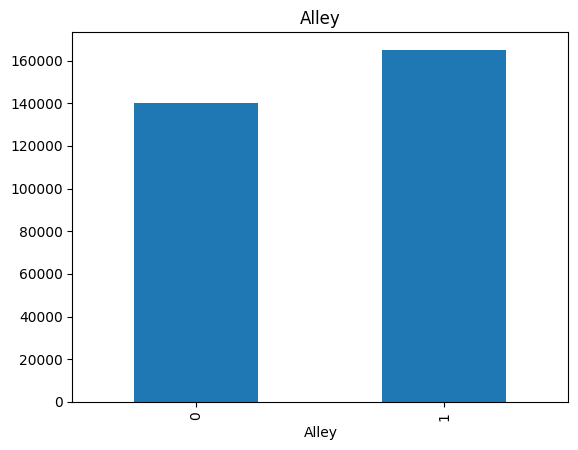

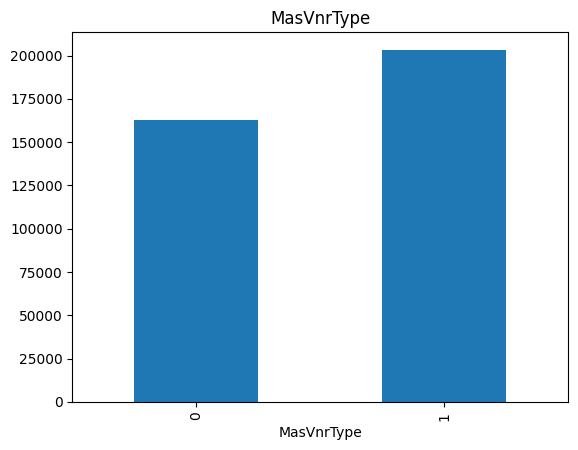

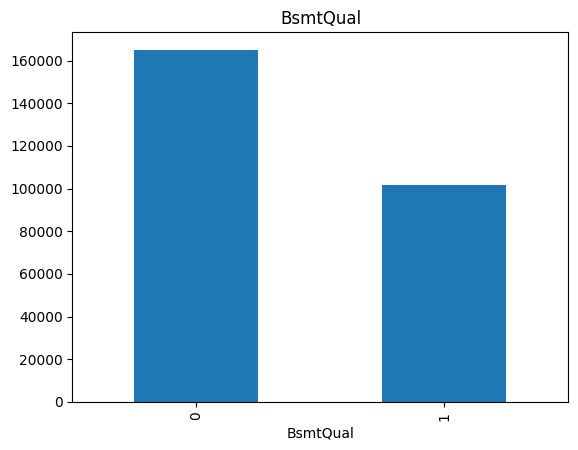

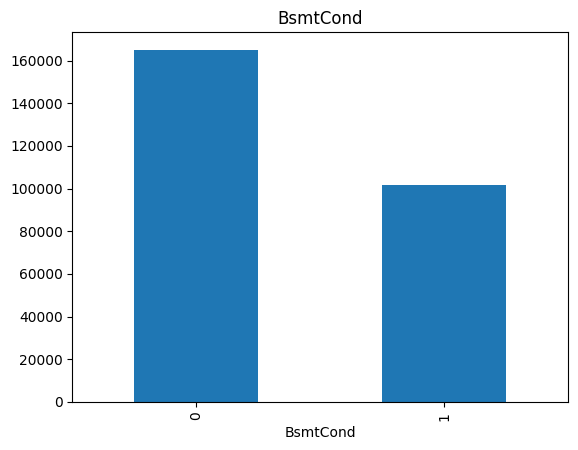

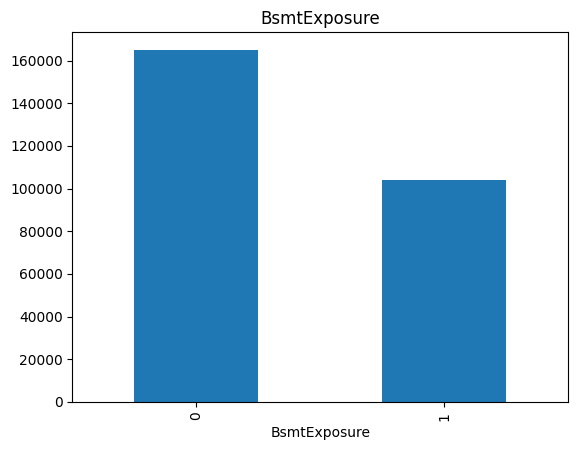

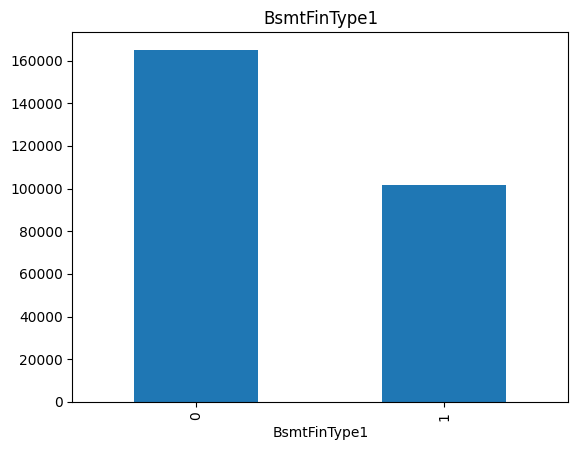

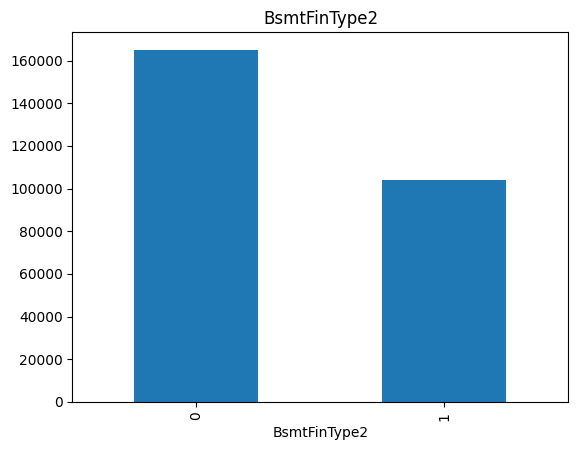

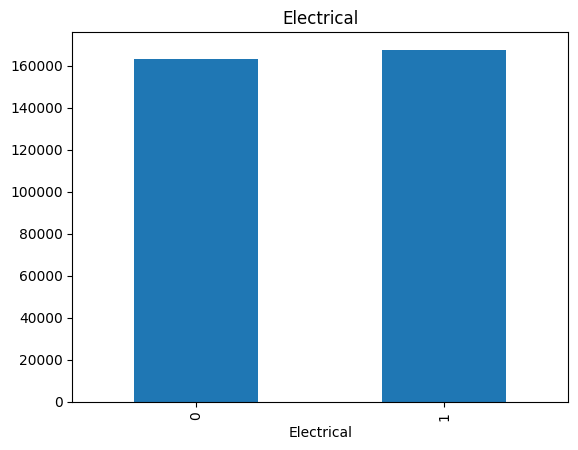

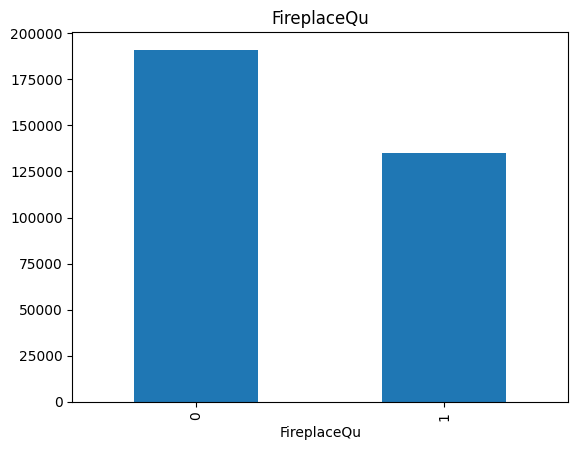

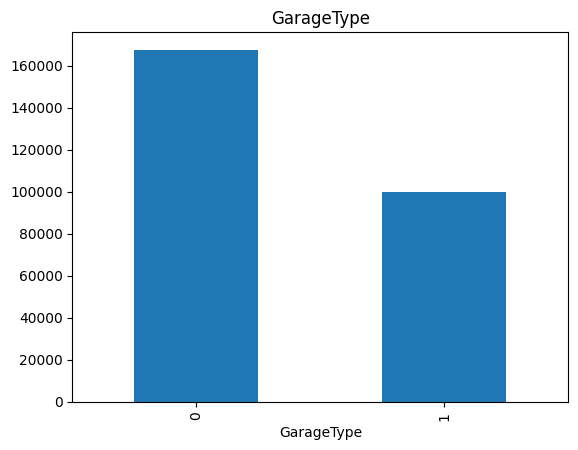

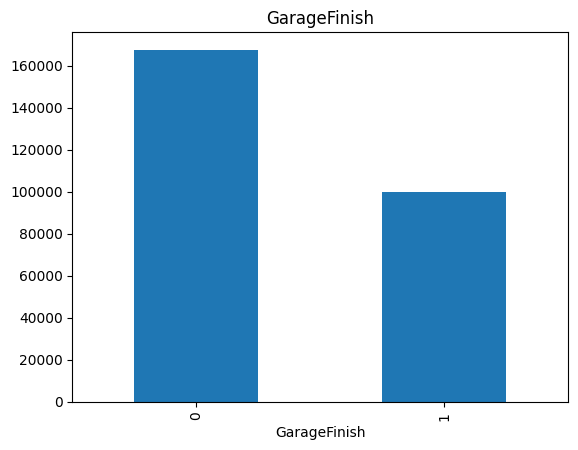

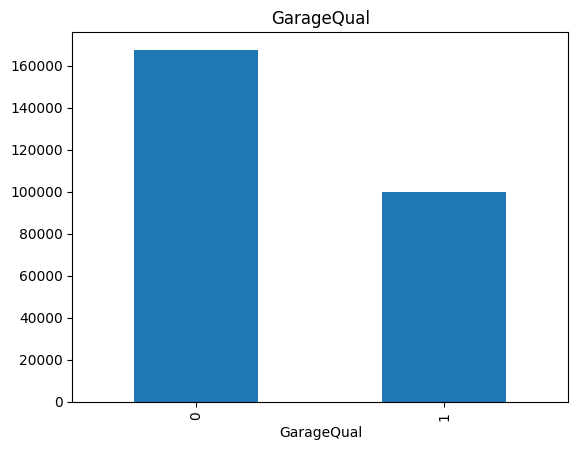

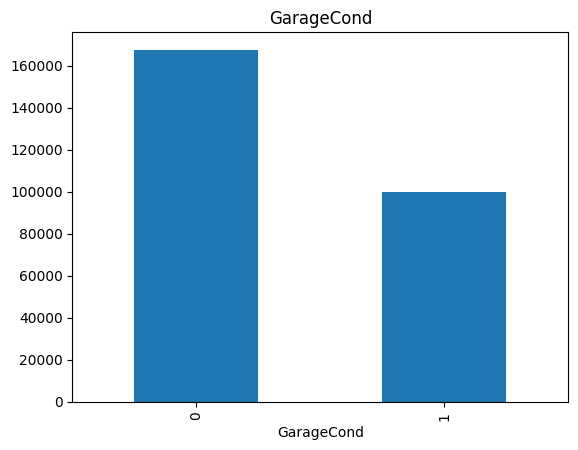

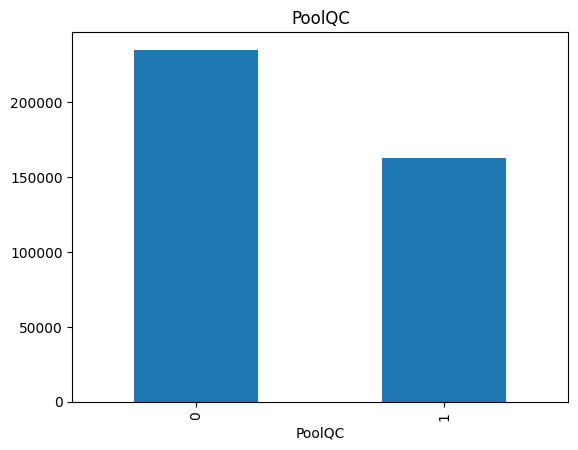

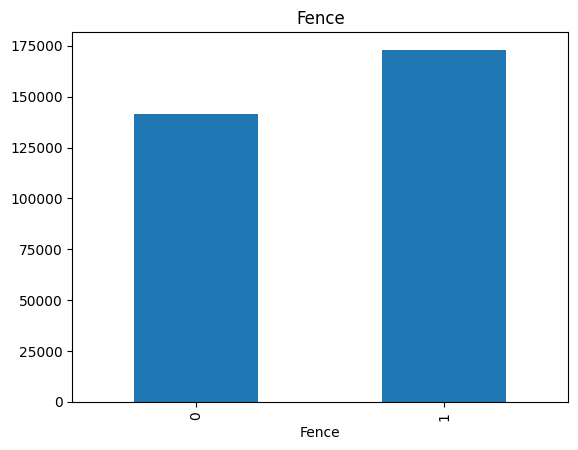

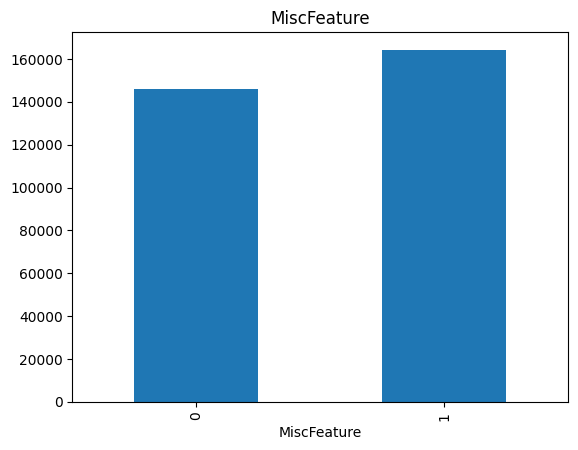

In [ ]:
# categorical columns
for col in cat_miss:
  datam= df_train.copy()
  datam[col] = np.where(datam[col].isnull(), 1, 0) # for a variable that is missing is replaced with a 1 and otherwise 0
  datam.groupby(col)['SalePrice'].median().plot.bar()
  plt.title(col)
  plt.show()


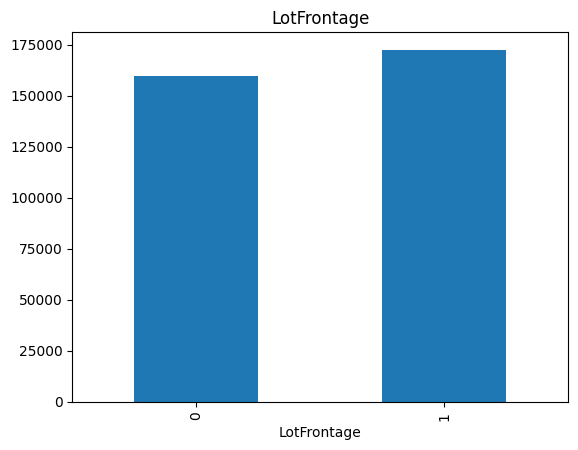

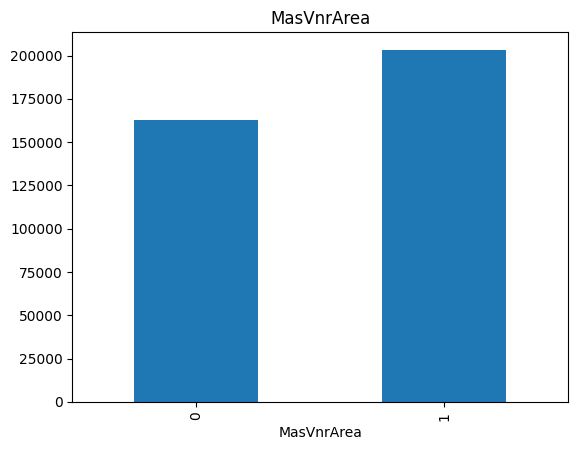

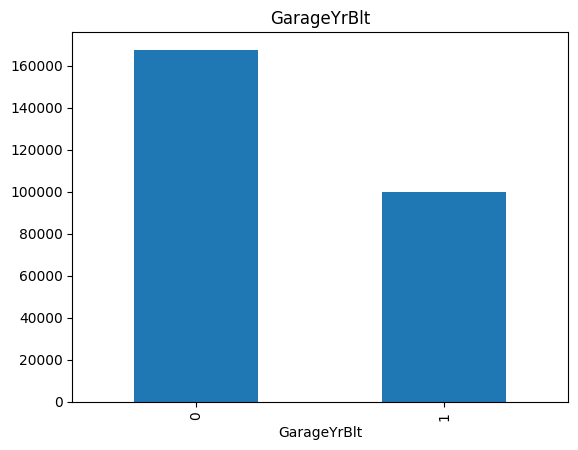

In [ ]:
# continuous columns
for col in cont_miss:
  datam= df_train.copy()
  datam[col] = np.where(datam[col].isnull(), 1, 0) # for a variable that is missing is replaced with a 1 and otherwise 0
  datam.groupby(col)['SalePrice'].median().plot.bar()
  plt.title(col)
  plt.show()

This indicates that the missing values have a substancial impact on the target variable

In [ ]:
year_col = [col for col in num if 'Year' in col or 'Yr' in col]
year_col

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

trying to undestand the relation between the year sold and the sale price

Text(0.5, 1.0, 'Sale Price Vs Year sold')

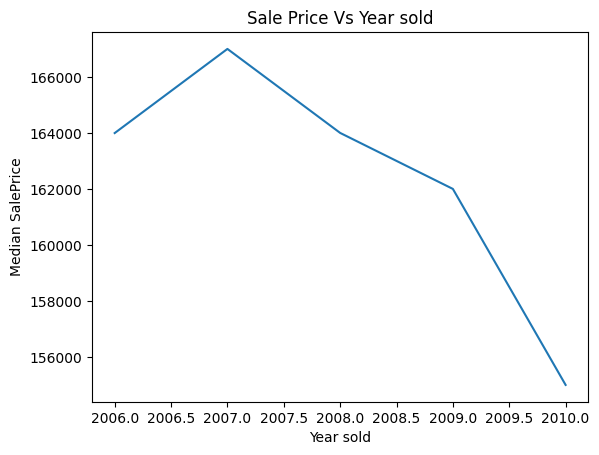

In [ ]:
df_train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year sold')
plt.ylabel('Median SalePrice')
plt.title('Sale Price Vs Year sold')

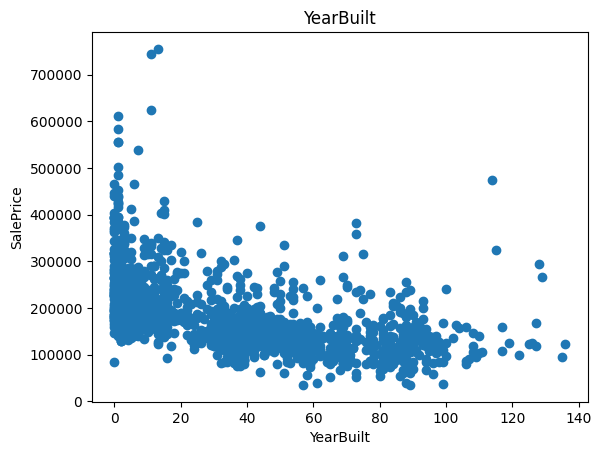

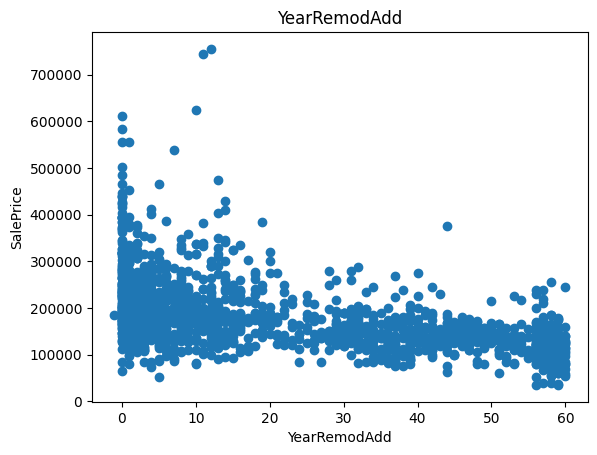

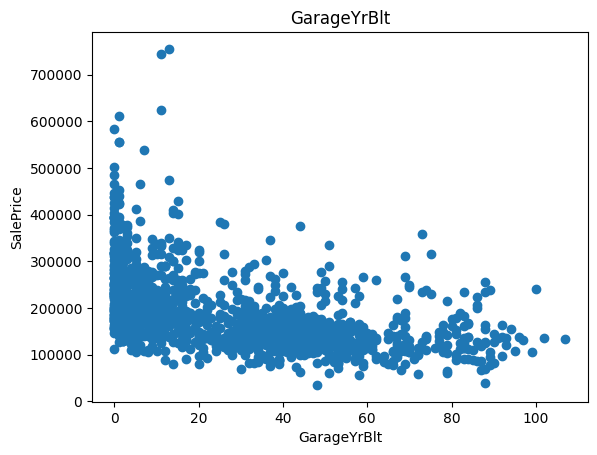

In [ ]:
for col in year_col:
  #datay = df_train.copy()
  if col != 'YrSold':
    datay = df_train.copy()
    datay[col] = datay['YrSold'] - datay[col]
    plt.scatter(datay[col], datay['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title(col)
    plt.show()


In general it can be observed that as the years increased from the time the houses were built and remodeled the price decreased

In [ ]:
disc_f = [col for col in num if len(df_train[col].unique()) <= 25 and col not in year_col]
disc_f

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [ ]:
df_train[disc_f].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
Id,,,,,,,,,,,,,,,,,
1,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
2,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
3,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
4,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
5,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


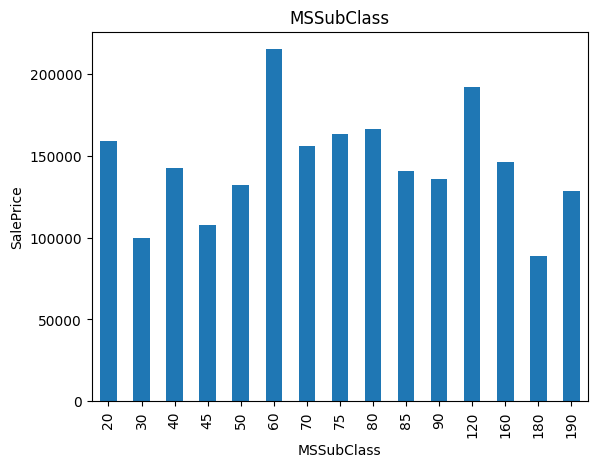

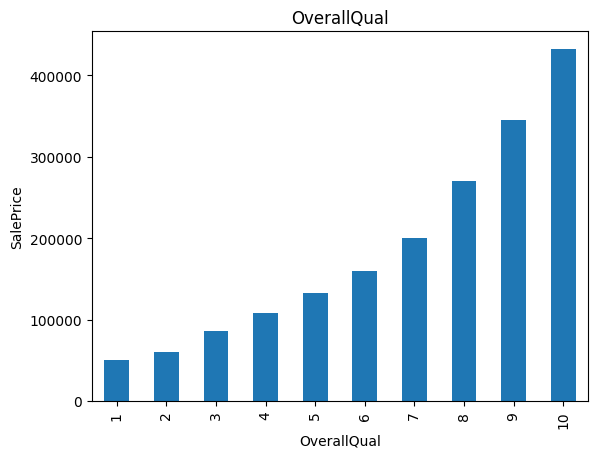

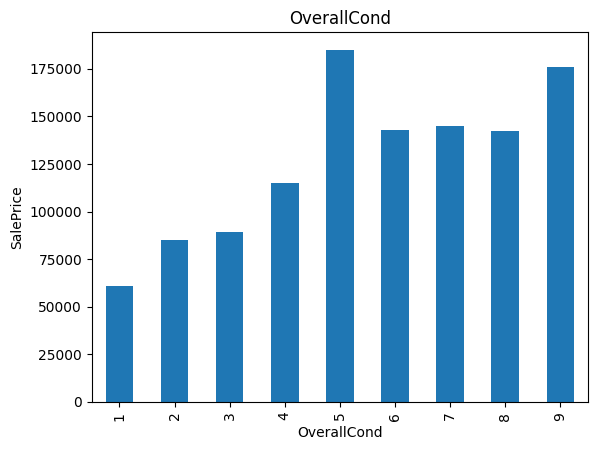

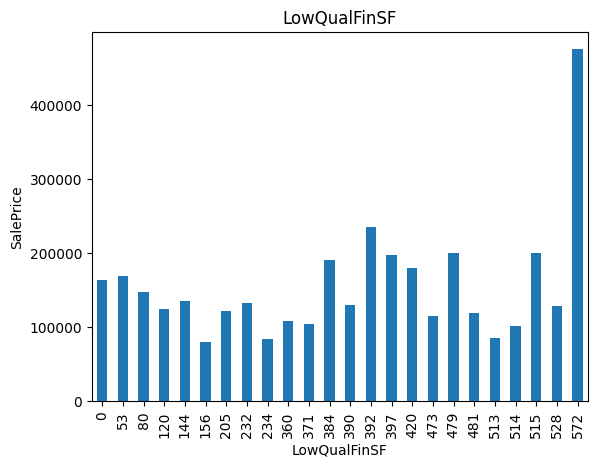

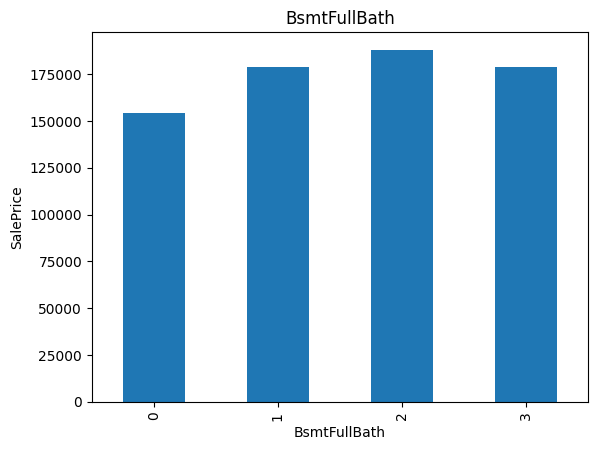

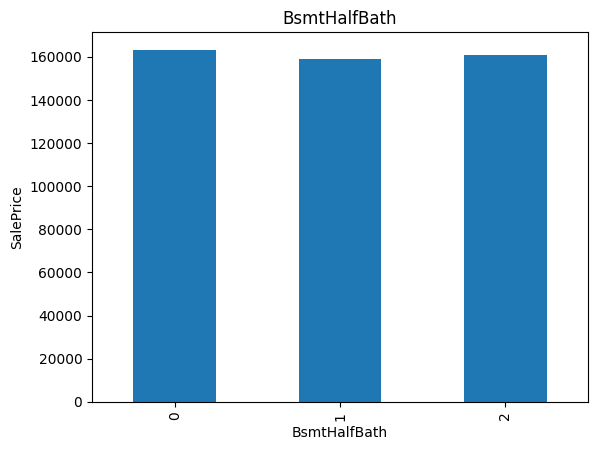

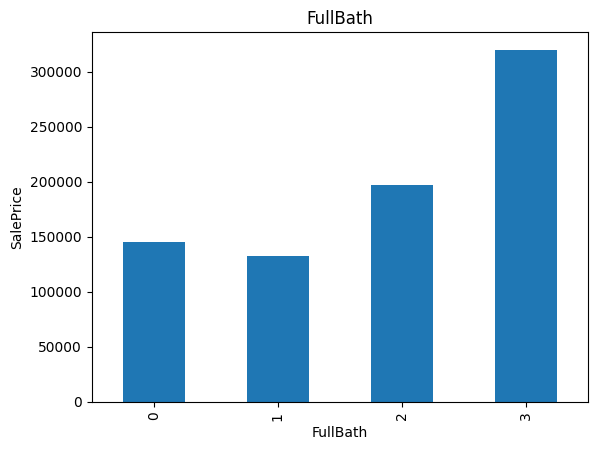

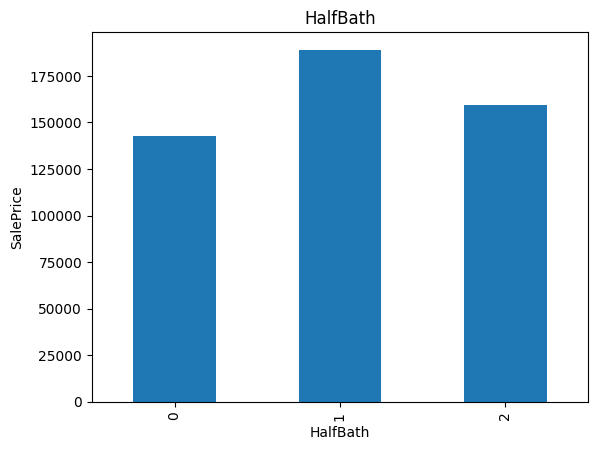

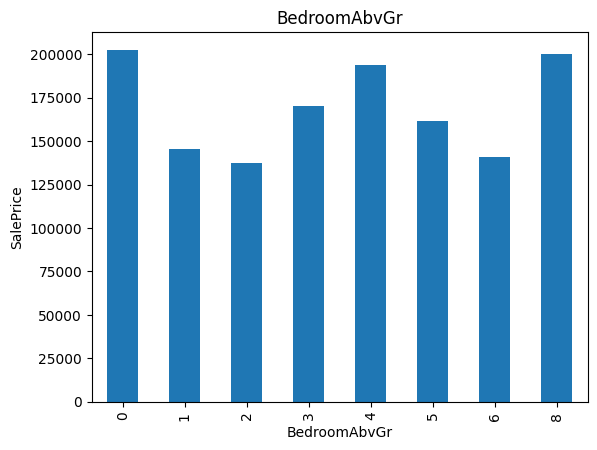

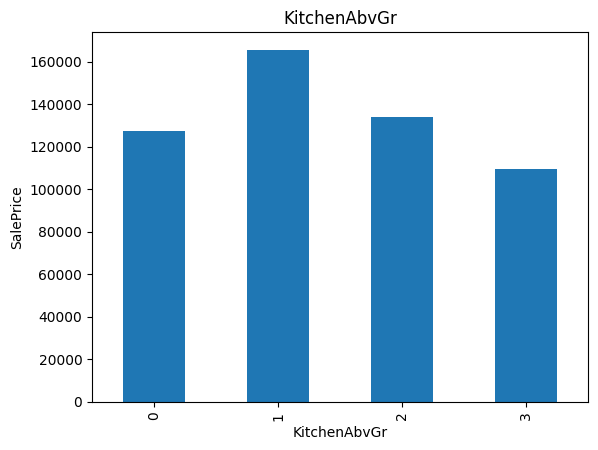

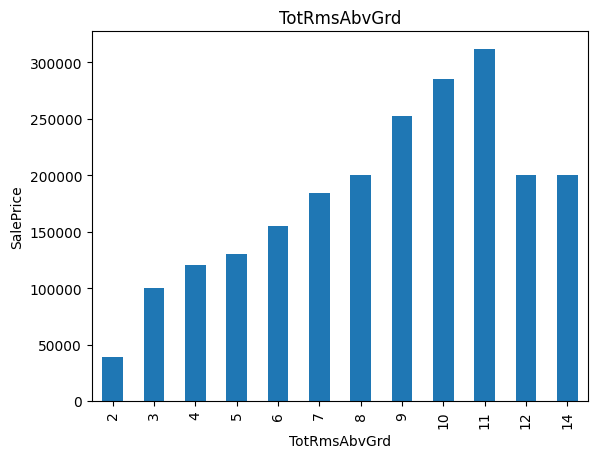

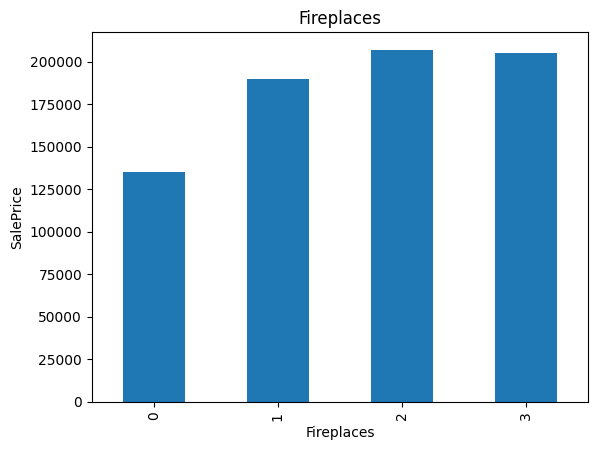

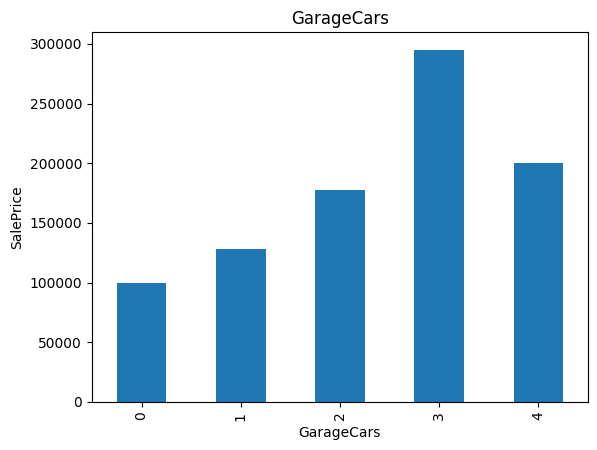

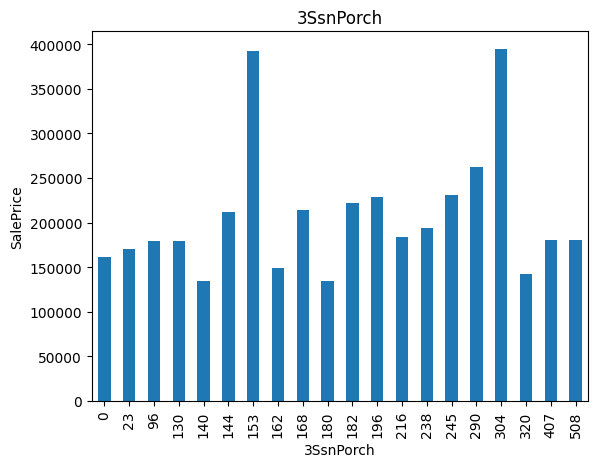

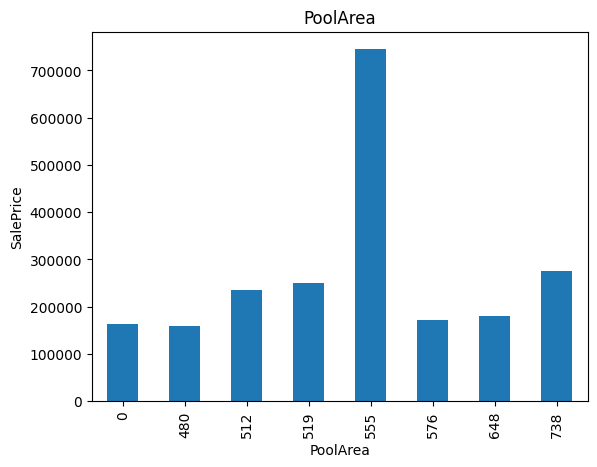

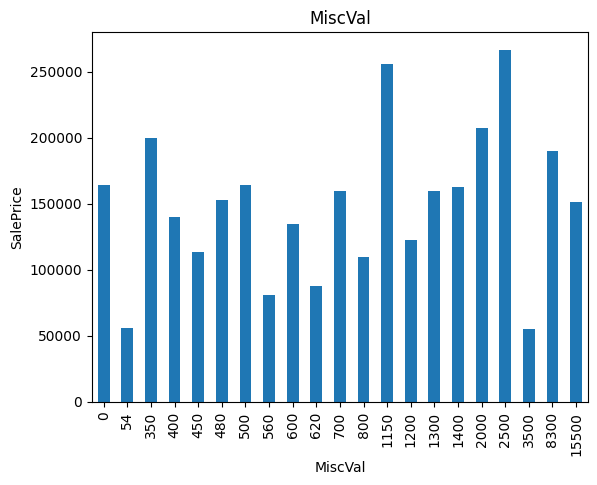

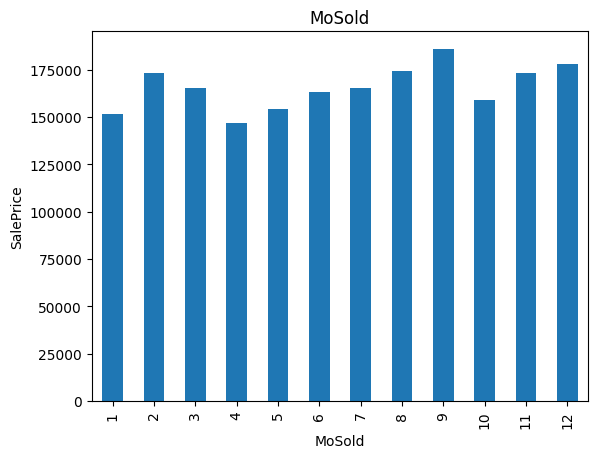

In [ ]:
for col in disc_f:
  datad = df_train.copy()
  datad.groupby(col)['SalePrice'].median().plot.bar()
  plt.xlabel(col)
  plt.ylabel('SalePrice')
  plt.title(col)
  plt.show()

continuous variables

In [ ]:
cont_f = [col for col in cont if col not in year_col]
len(cont_f)

16

<Axes: xlabel='MoSold'>

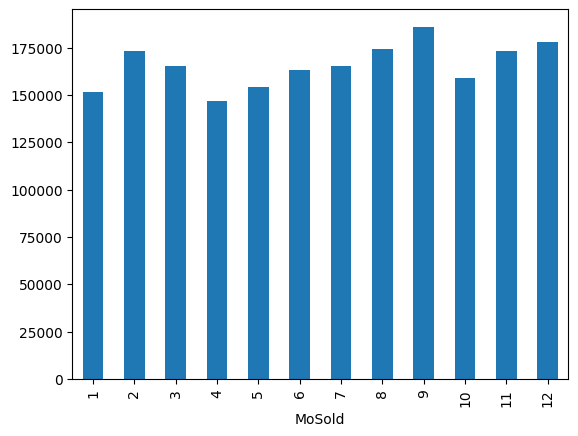

In [ ]:
df_train.groupby('MoSold')['SalePrice'].median().plot.bar()

There is no significant variance in the prices basing on the Month sold

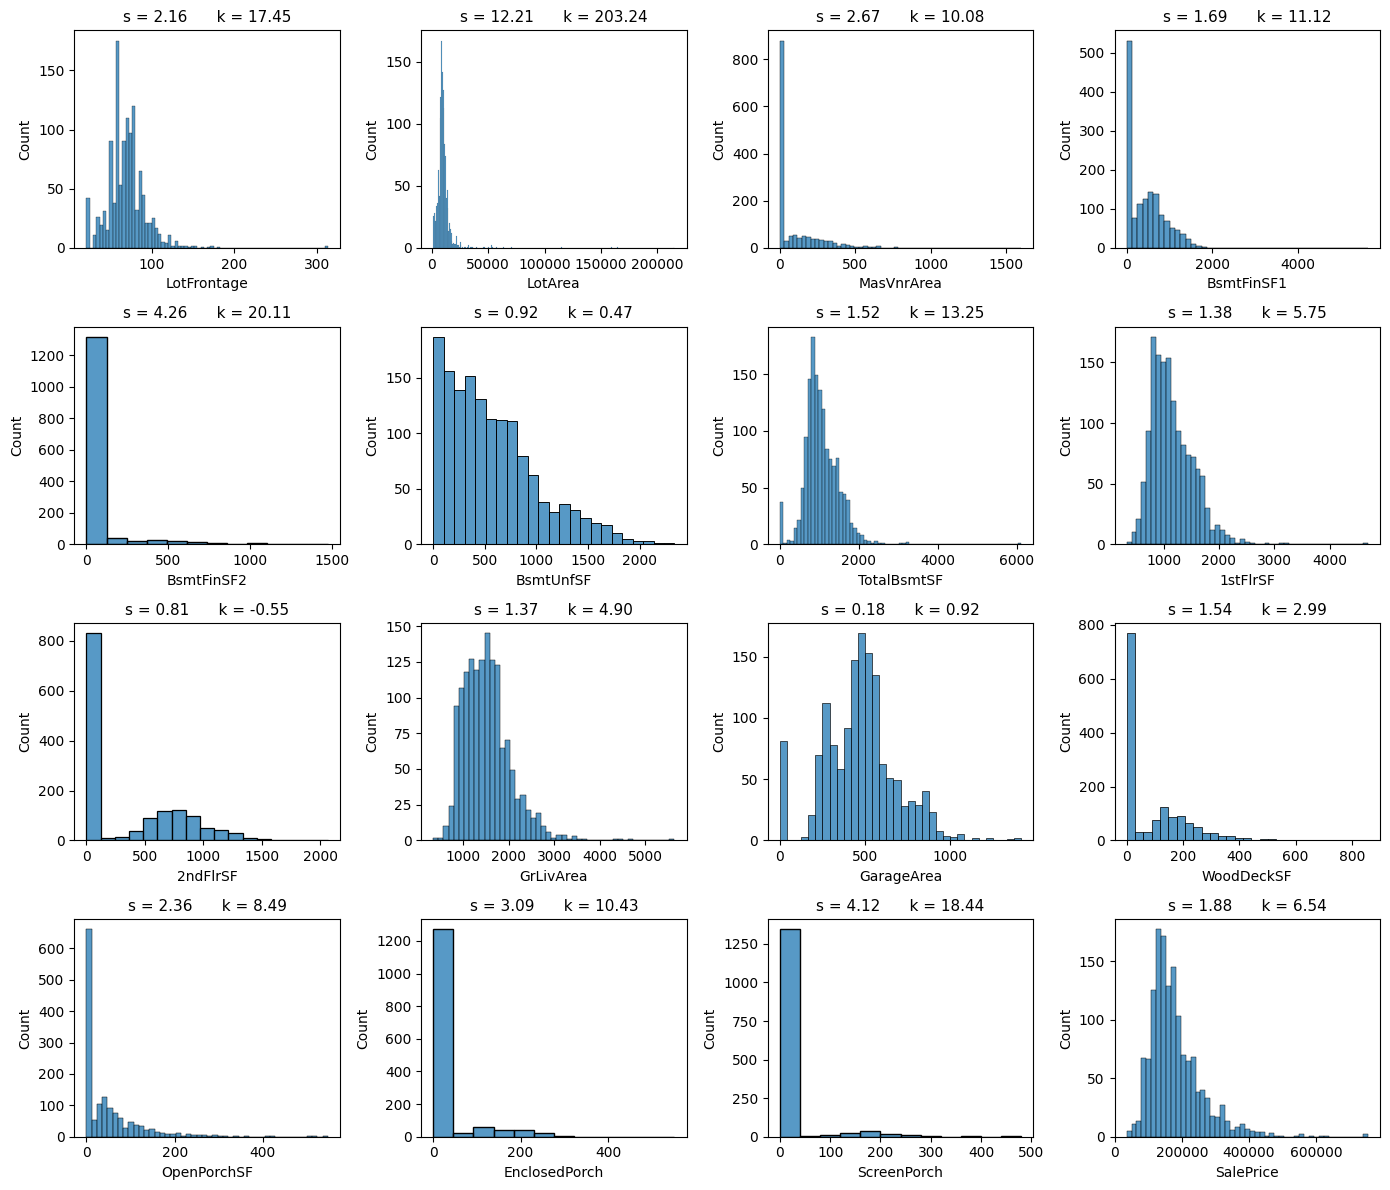

In [ ]:
nr_rows = 4
nr_cols = 4
fig, axes = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
  for c in range(0,nr_cols):
    i = r*nr_cols+c
    if i < len(cont_f):
       sns.histplot(x = cont_f[i],data = df_train, ax = axes[r][c])
       sk = df_train[cont_f[i]].skew()
       krt = df_train[cont_f[i]].kurt()
       #axs[r][c].text(0.4,0.9,"title",fontsize=7)
       str_title = "s = " + "{0:.2f}".format(sk) + "      " "k = " + "{0:.2f}".format(krt)
       axes[r][c].set_title(str_title,fontsize=11)
plt.tight_layout()
plt.show()

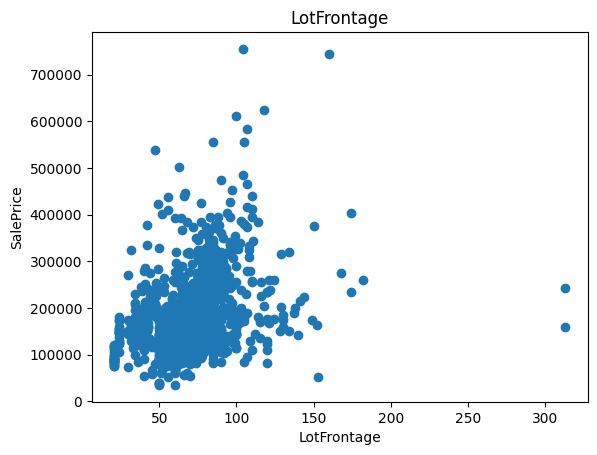

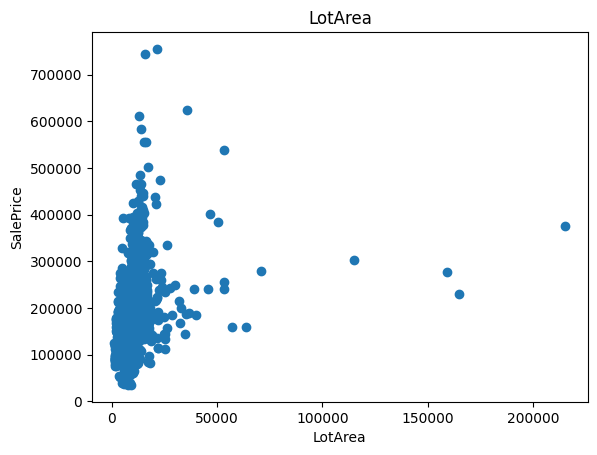

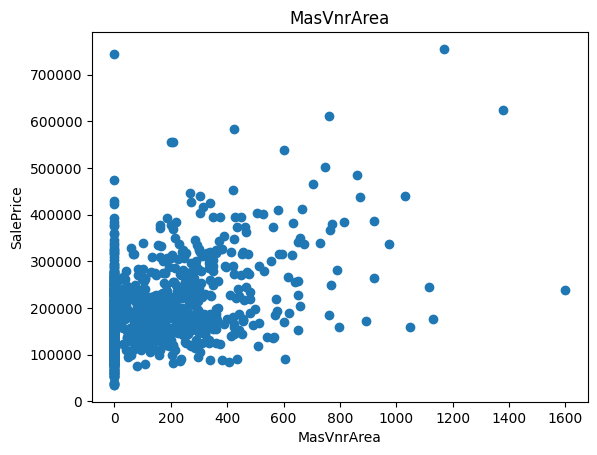

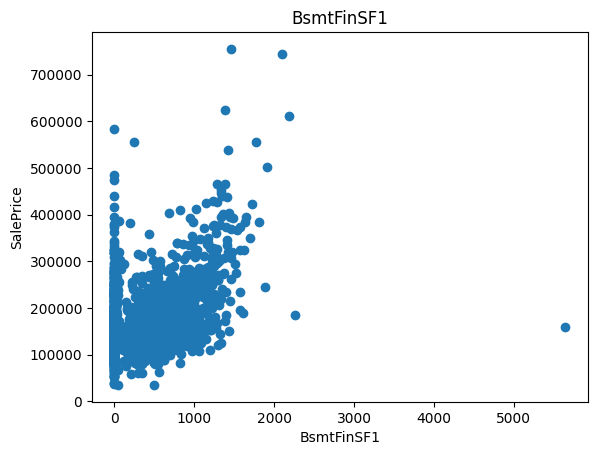

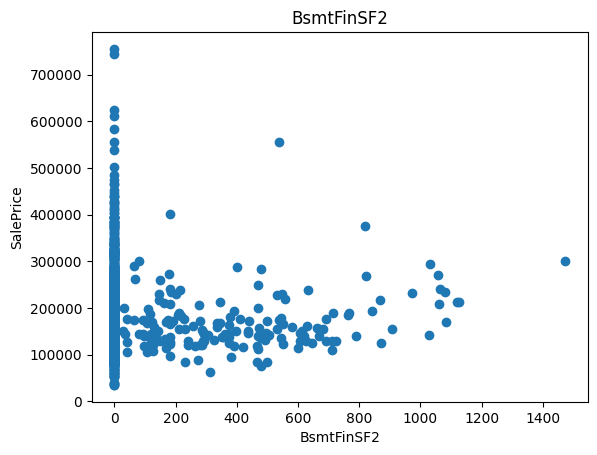

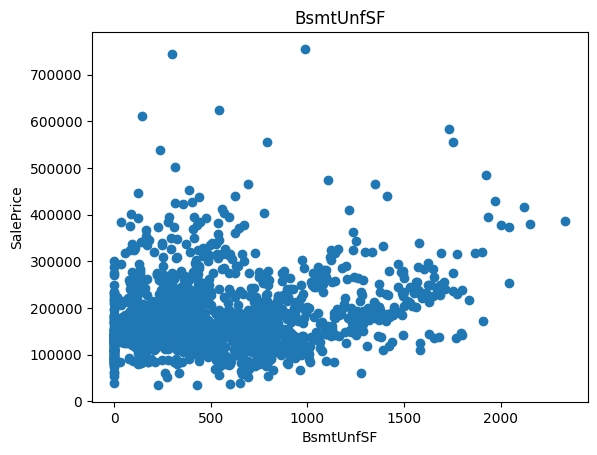

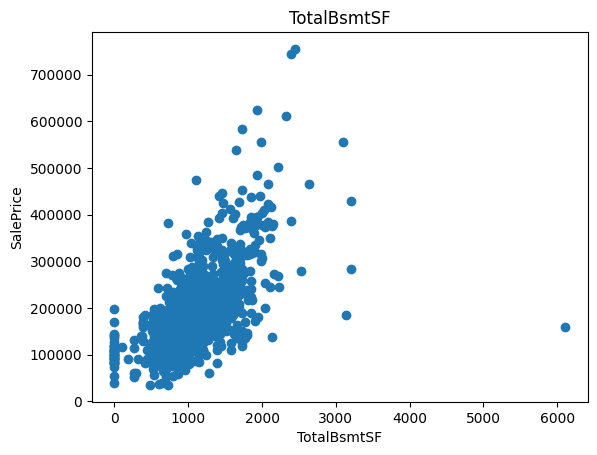

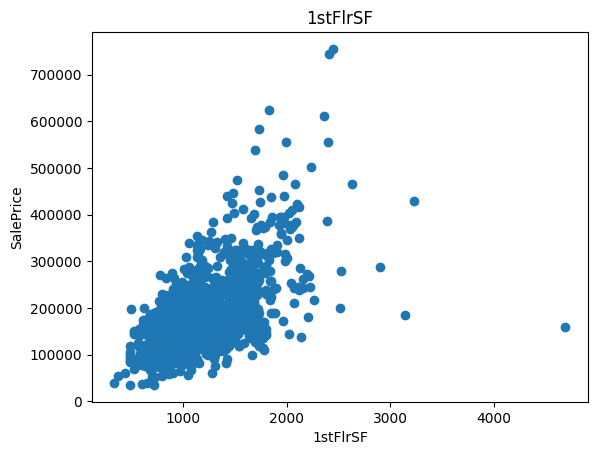

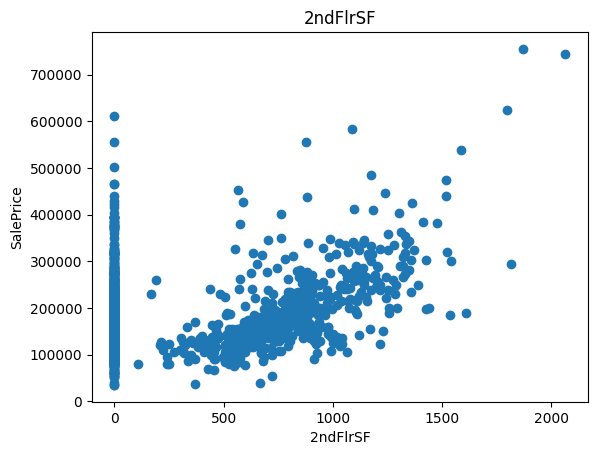

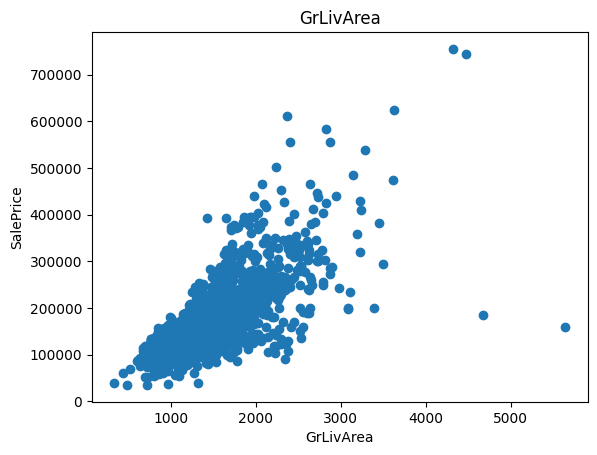

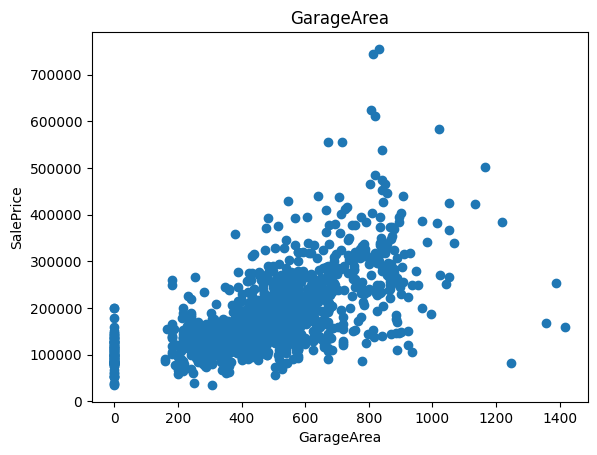

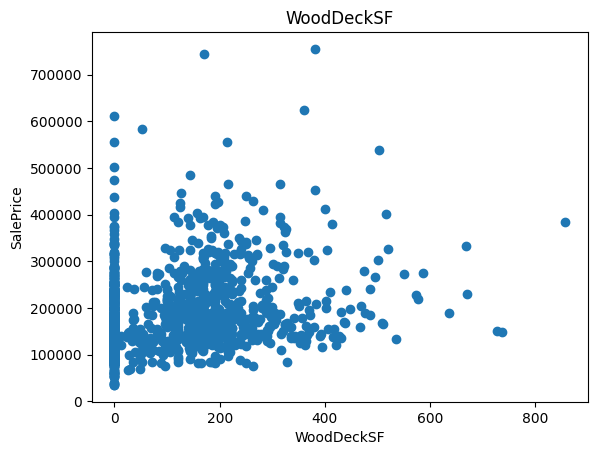

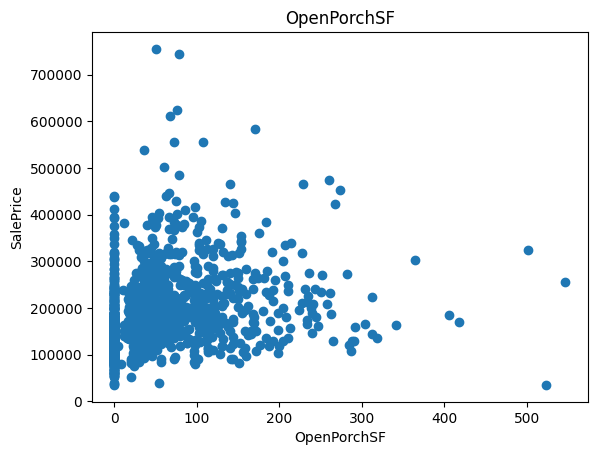

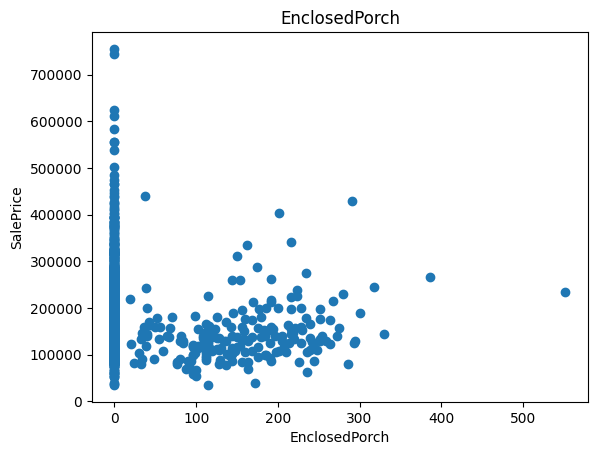

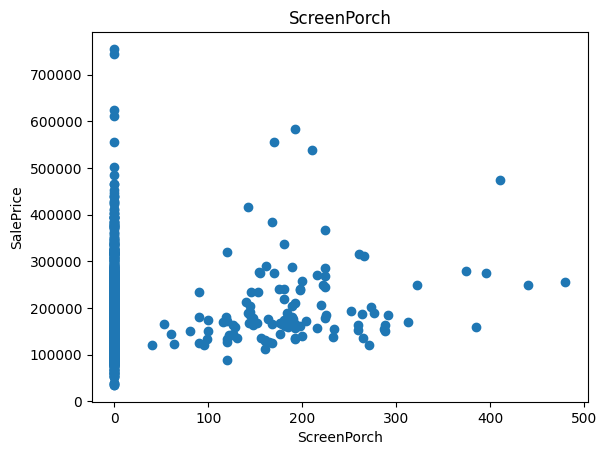

In [ ]:
for col in cont_f:
  if col != 'SalePrice':
    plt.scatter(df_train[col], df_train['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title(col)
    plt.show()

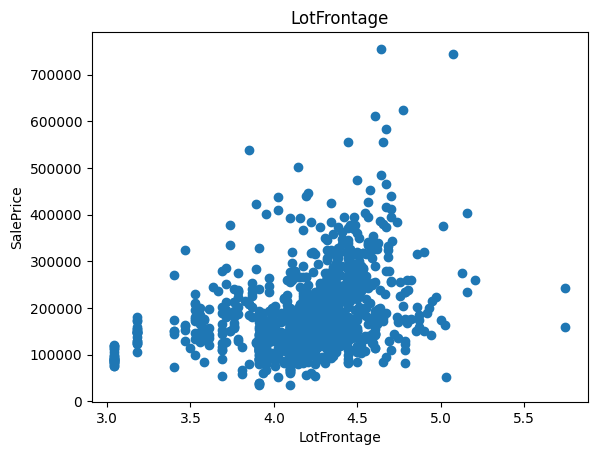

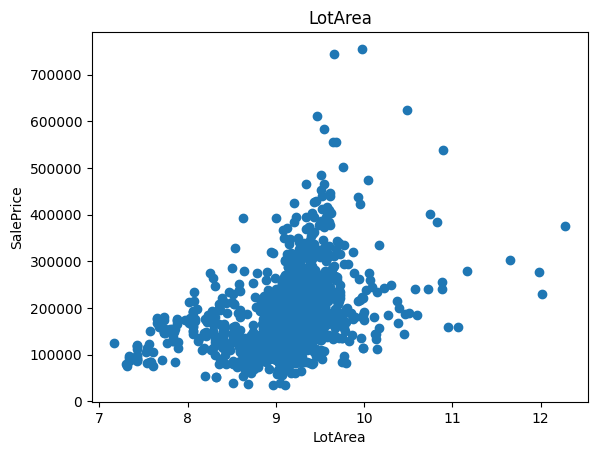

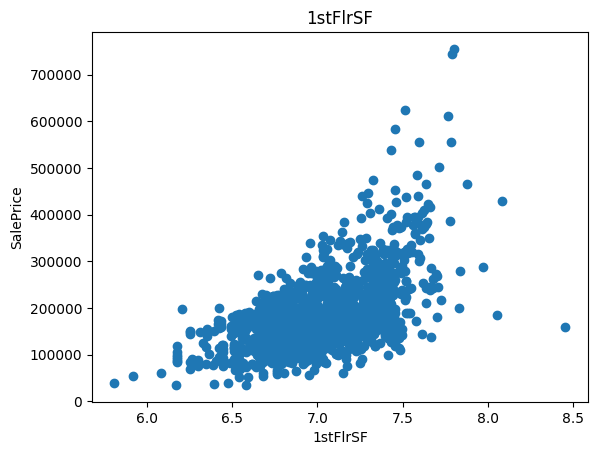

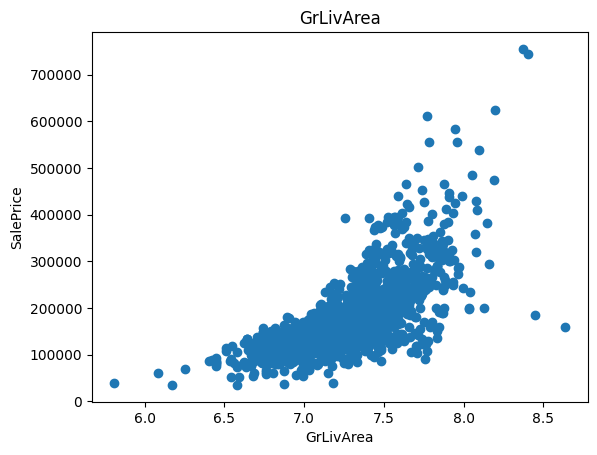

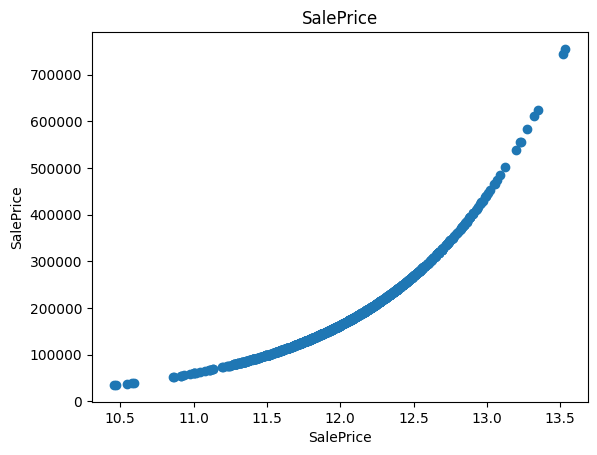

In [ ]:
for col in cont_f:
  datc = df_train.copy()
  if 0 in datc[col].unique():
    pass
  else:
    datc[col] = np.log(datc[col])

    plt.scatter(datc[col], df_train['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title(col)
    plt.show()

Outliers

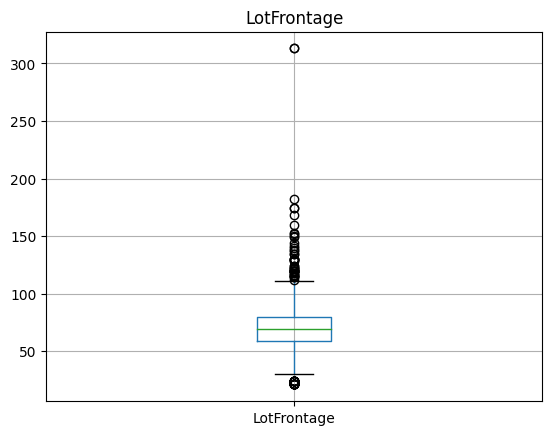

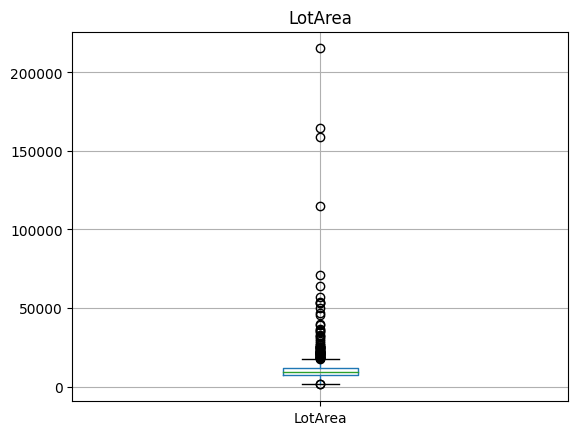

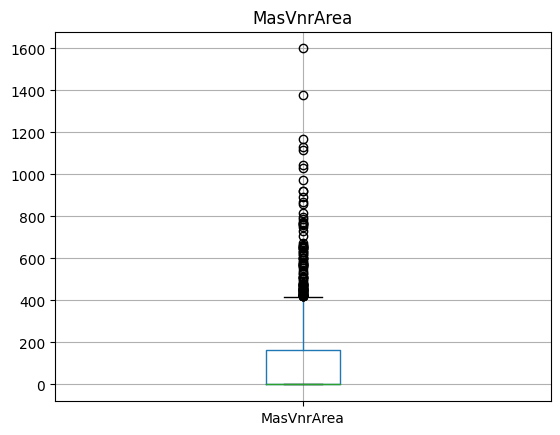

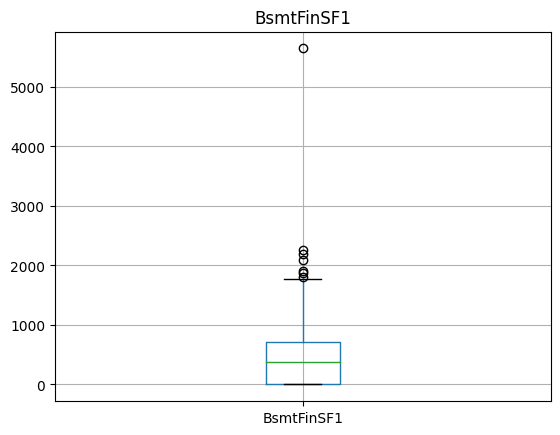

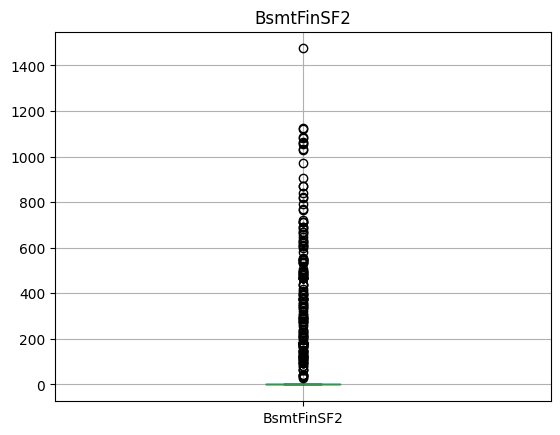

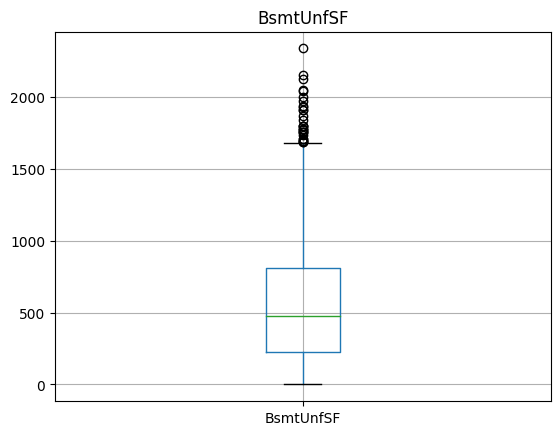

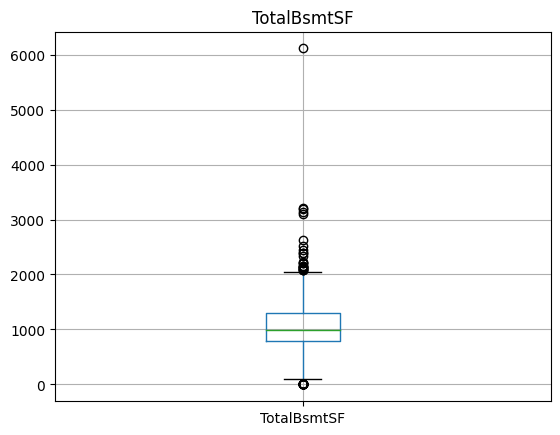

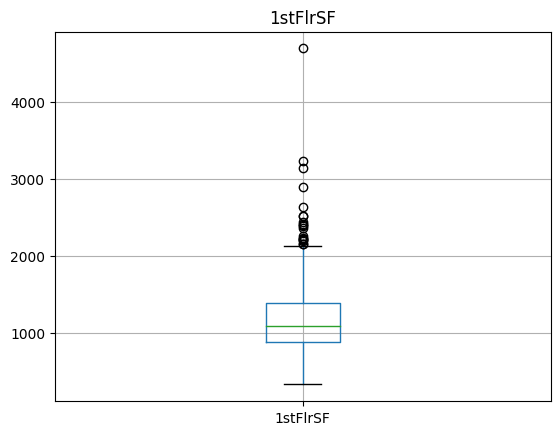

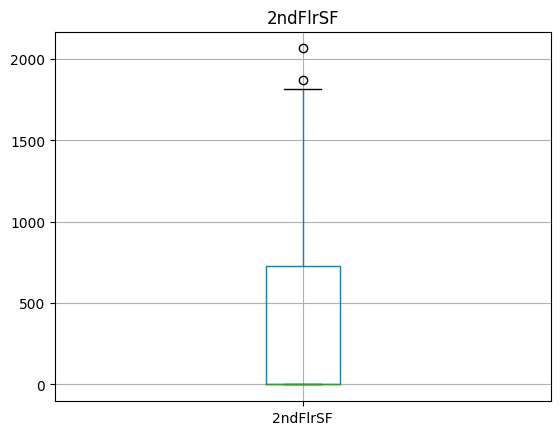

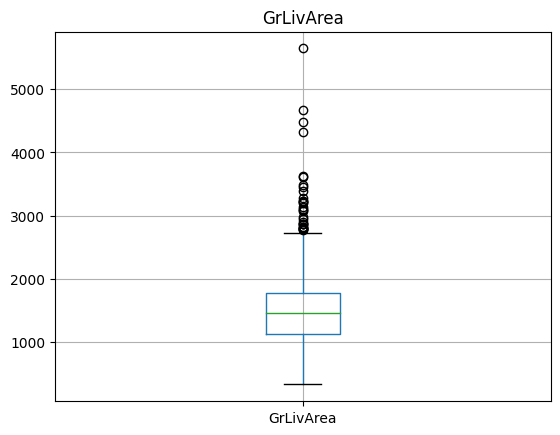

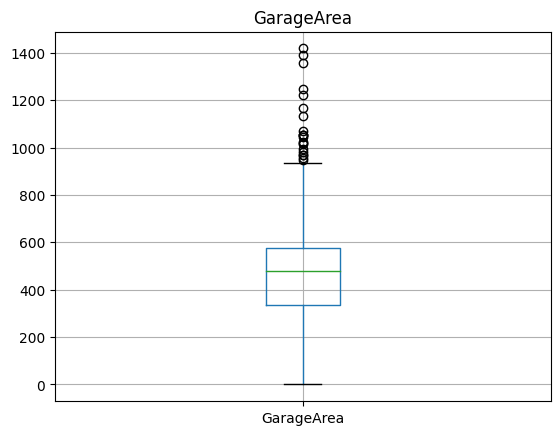

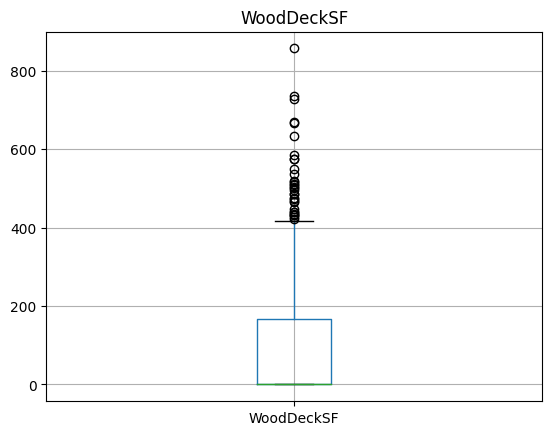

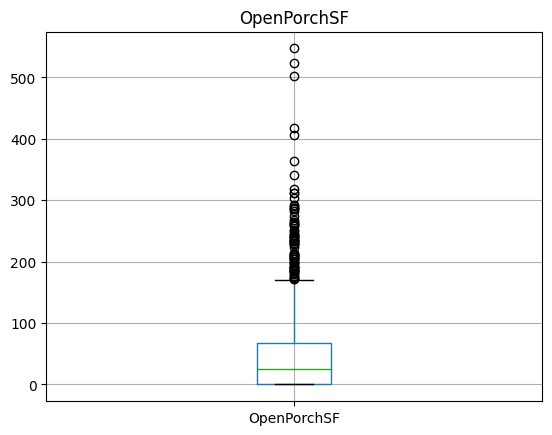

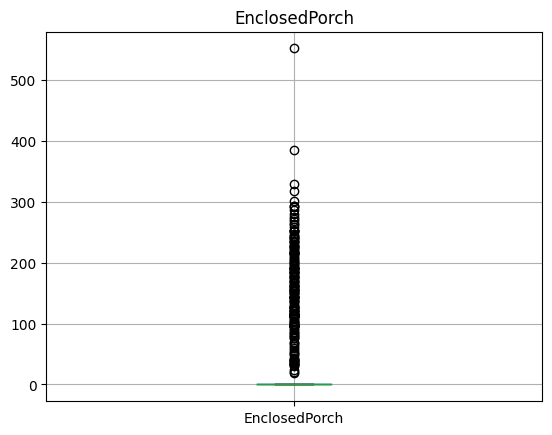

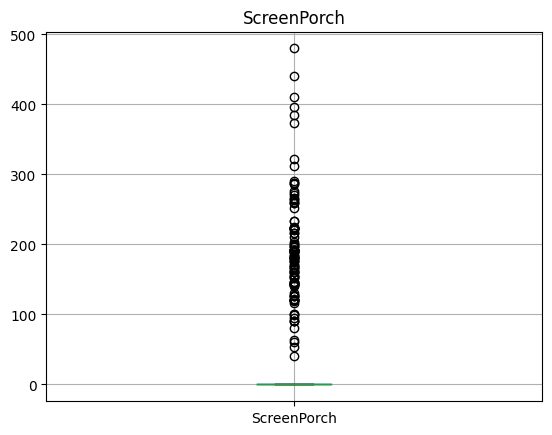

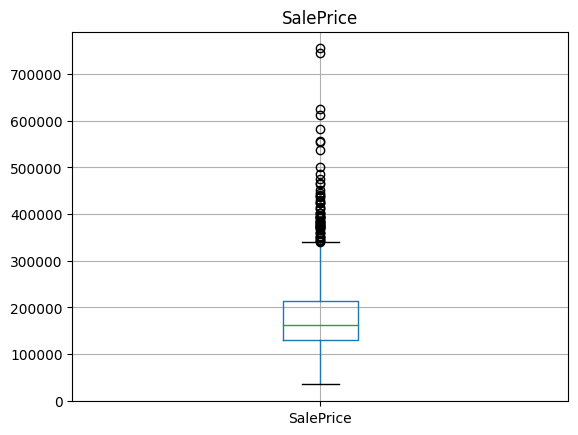

In [ ]:
for col in cont_f:
  df_train.boxplot(column = col)
  plt.title(col)
  plt.show()

Categorical variables

In [ ]:
for col in cat:
  print('{} has {} unique values'.format(col, df_train[col].nunique()))

MSZoning has 5 unique values
Street has 2 unique values
Alley has 2 unique values
LotShape has 4 unique values
LandContour has 4 unique values
Utilities has 2 unique values
LotConfig has 5 unique values
LandSlope has 3 unique values
Neighborhood has 25 unique values
Condition1 has 9 unique values
Condition2 has 8 unique values
BldgType has 5 unique values
HouseStyle has 8 unique values
RoofStyle has 6 unique values
RoofMatl has 8 unique values
Exterior1st has 15 unique values
Exterior2nd has 16 unique values
MasVnrType has 4 unique values
ExterQual has 4 unique values
ExterCond has 5 unique values
Foundation has 6 unique values
BsmtQual has 4 unique values
BsmtCond has 4 unique values
BsmtExposure has 4 unique values
BsmtFinType1 has 6 unique values
BsmtFinType2 has 6 unique values
Heating has 6 unique values
HeatingQC has 5 unique values
CentralAir has 2 unique values
Electrical has 5 unique values
KitchenQual has 4 unique values
Functional has 7 unique values
FireplaceQu has 5 unique

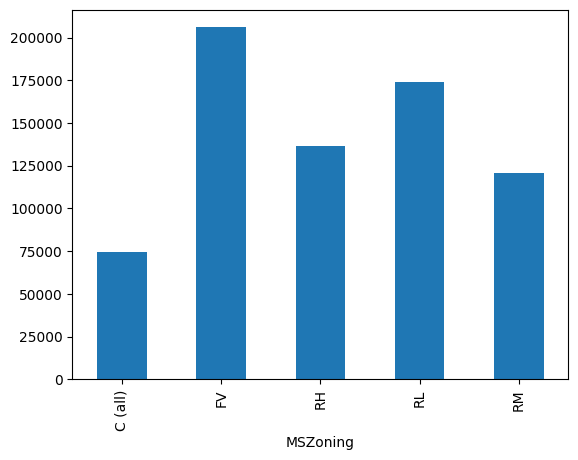

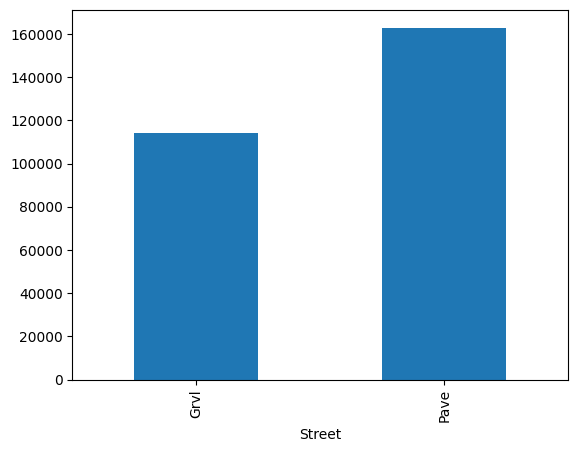

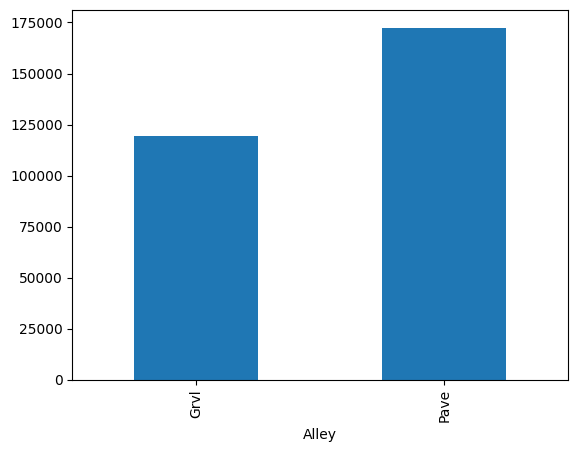

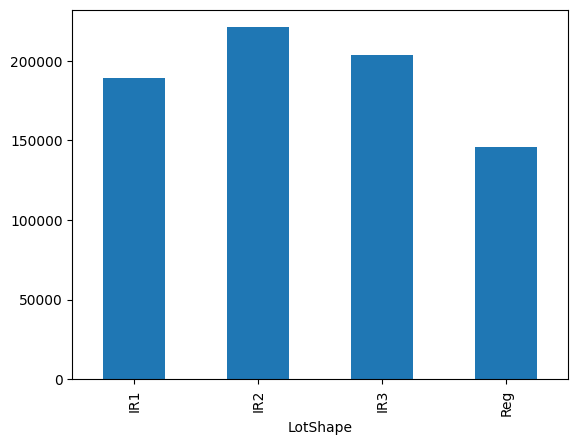

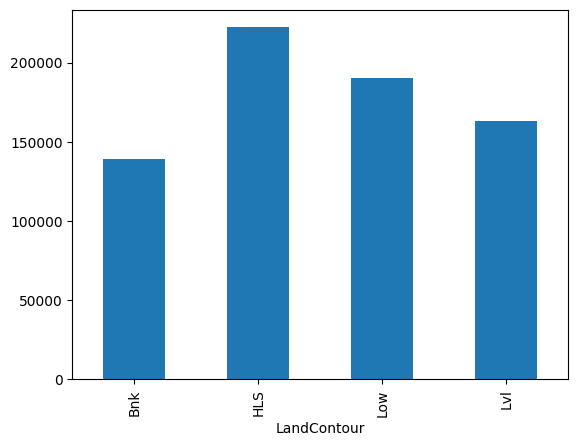

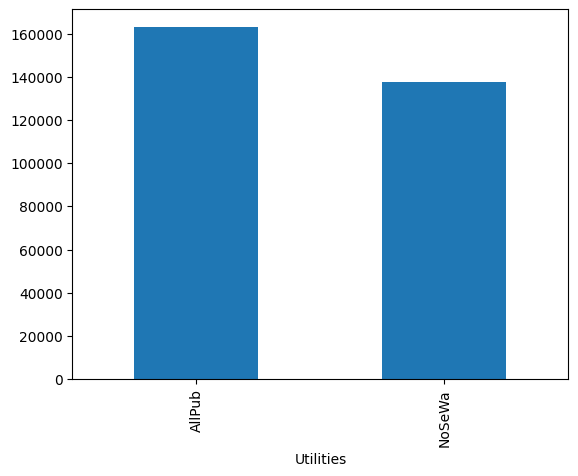

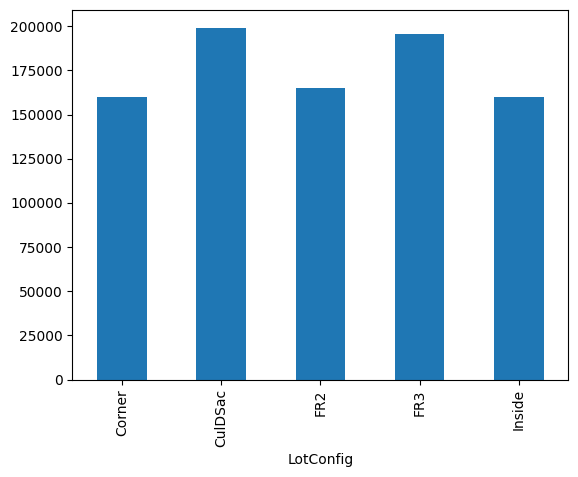

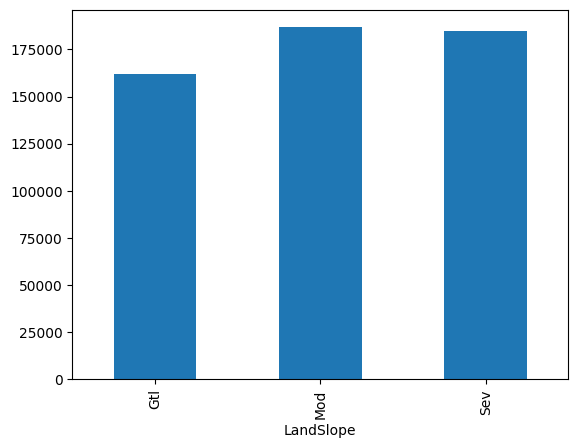

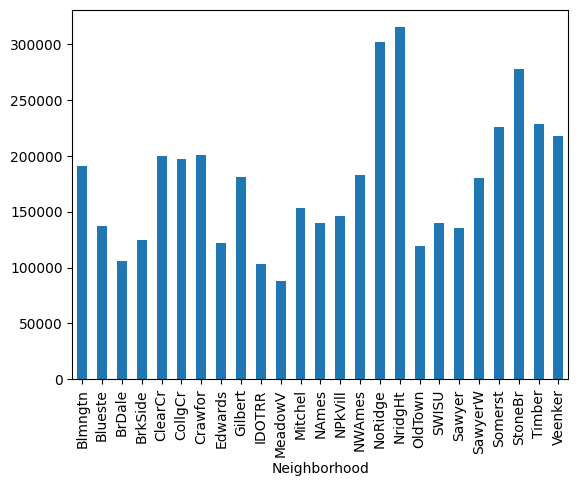

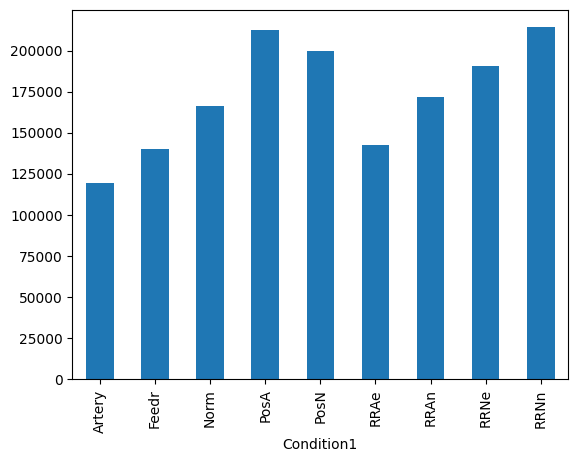

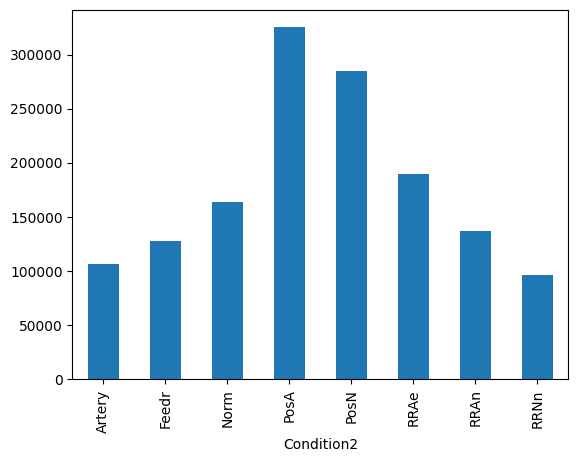

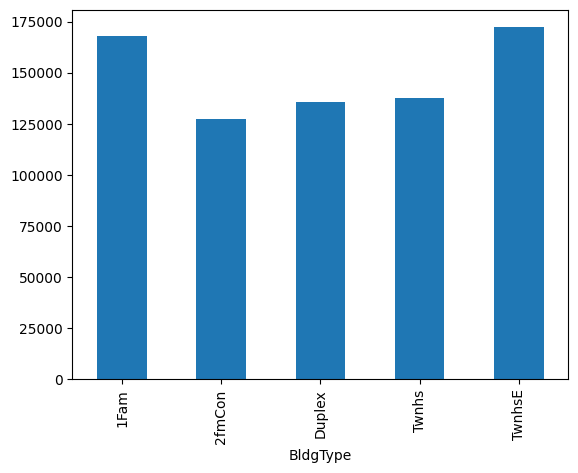

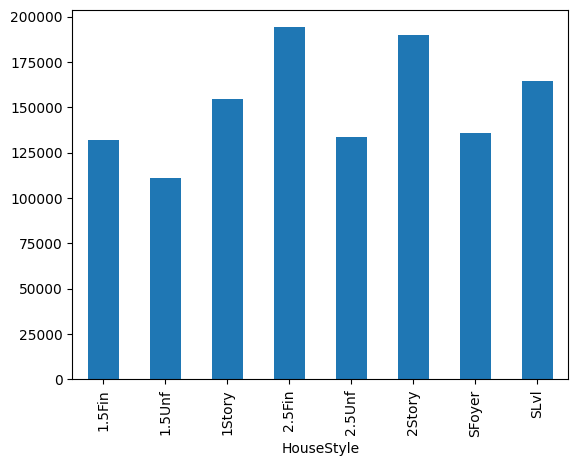

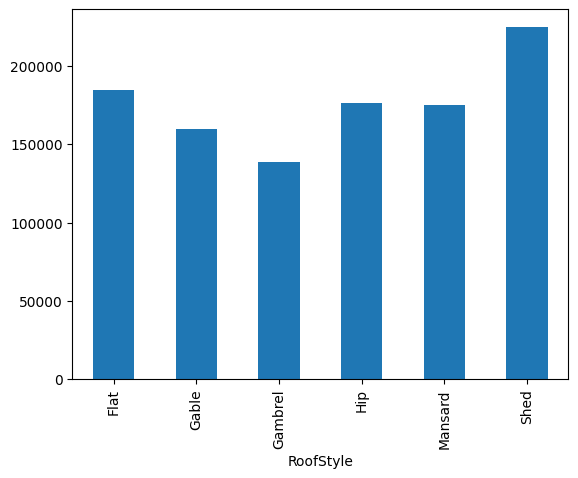

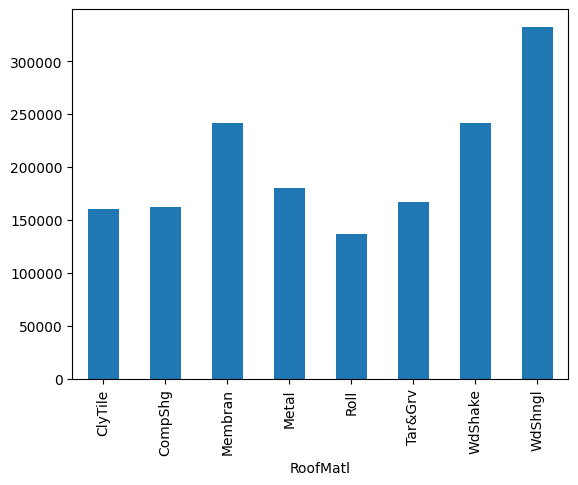

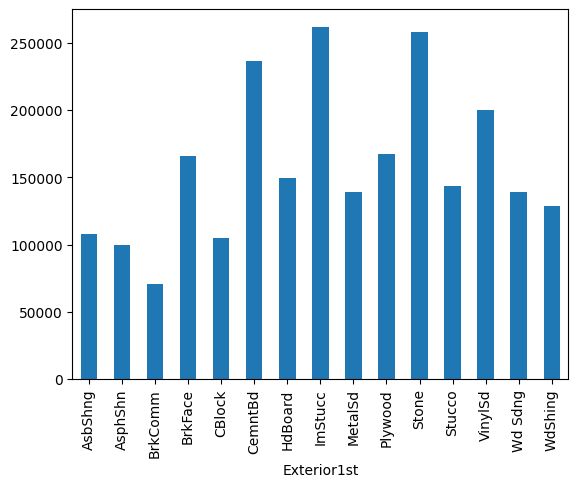

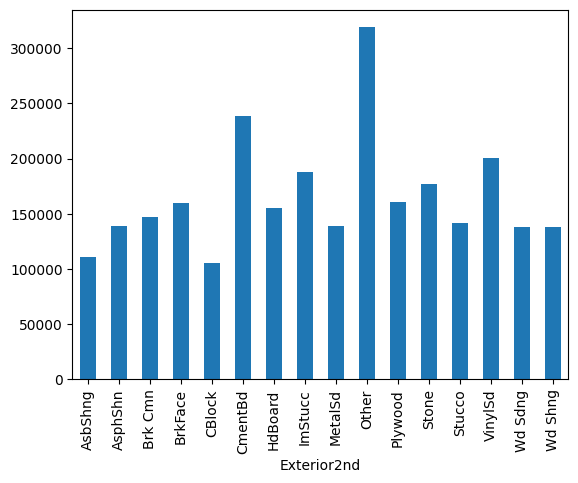

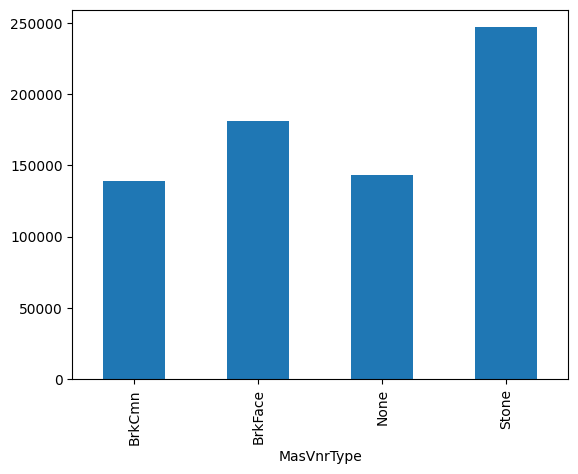

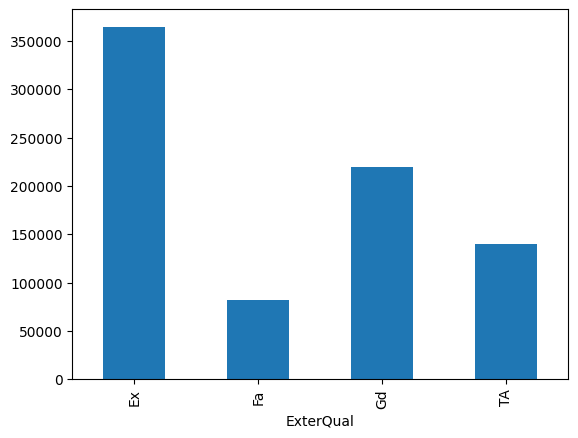

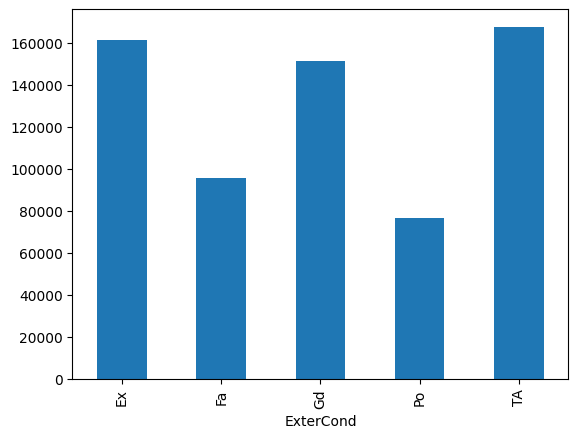

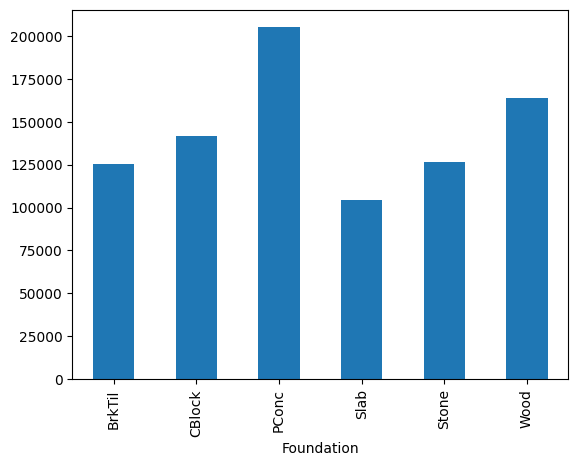

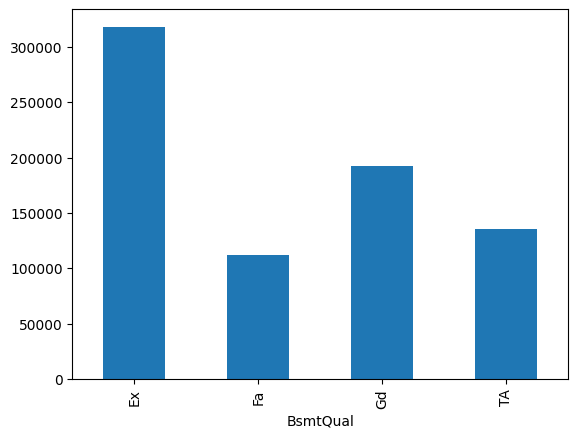

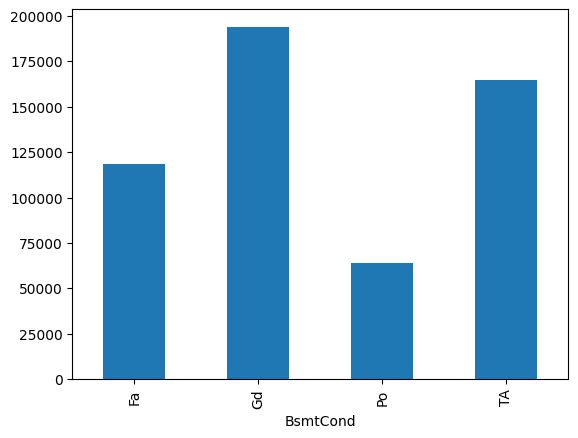

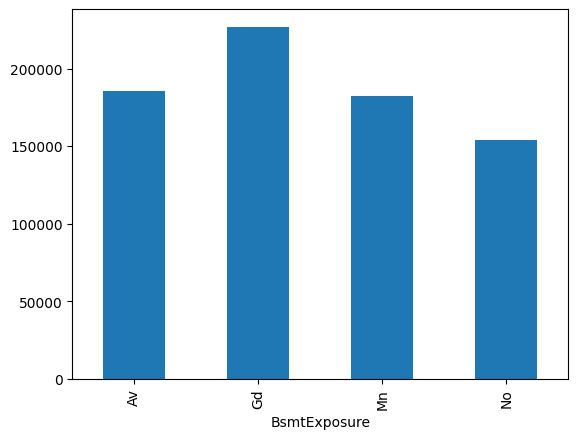

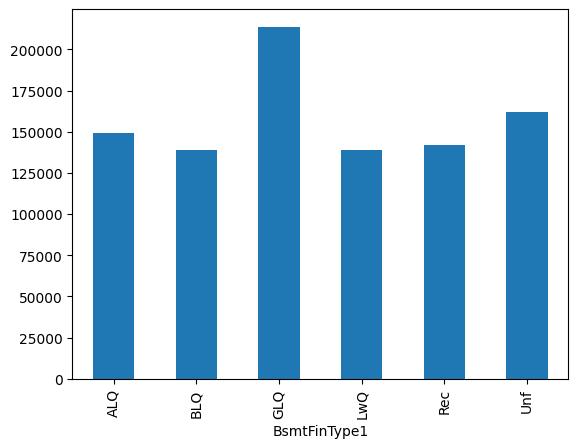

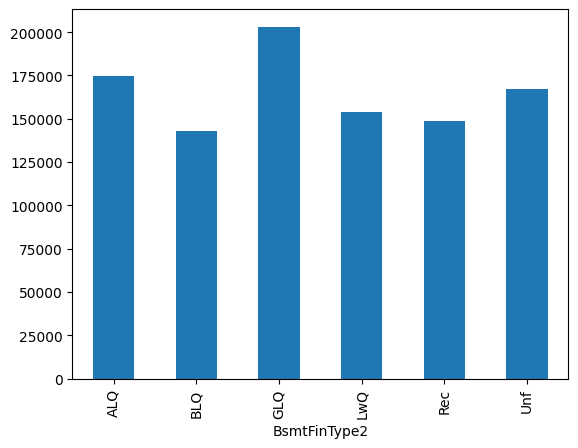

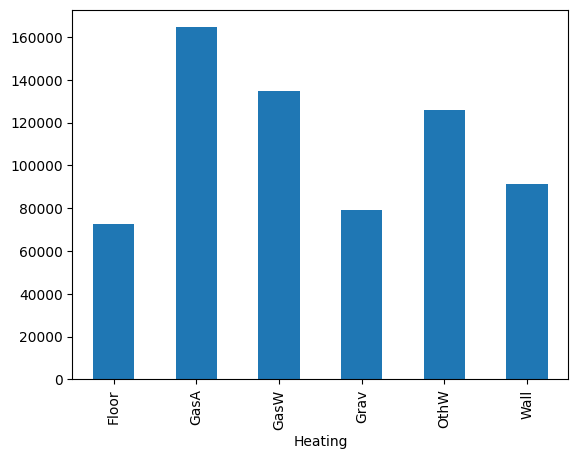

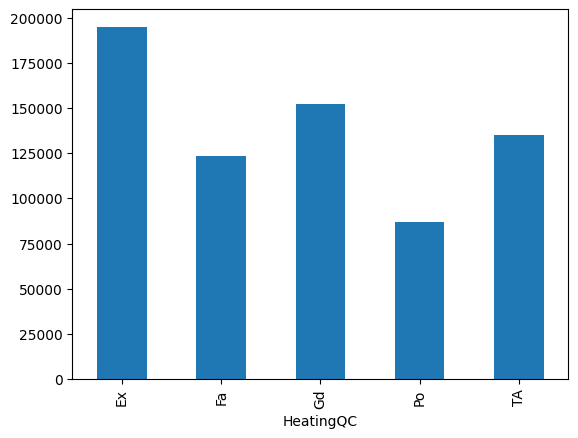

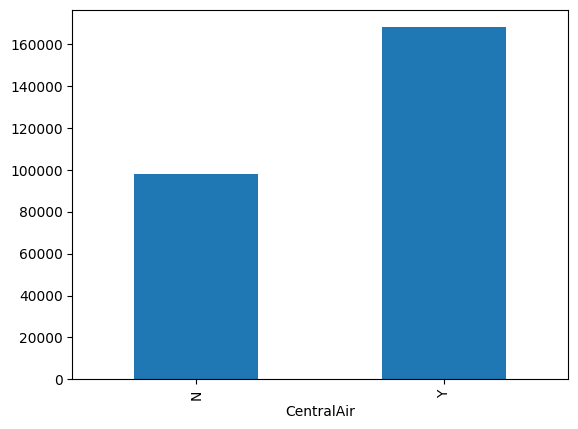

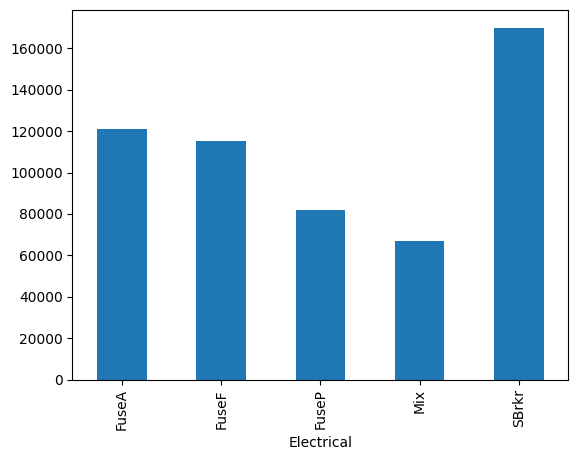

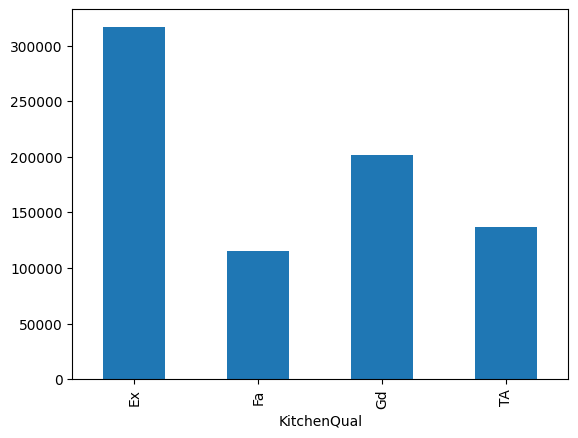

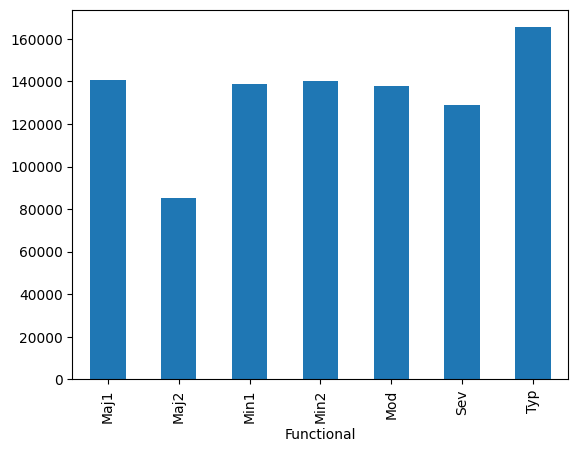

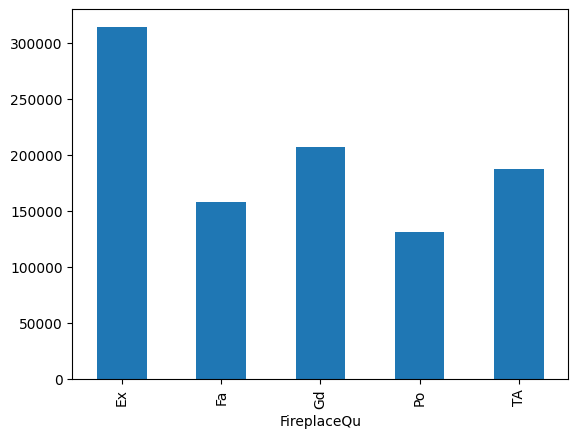

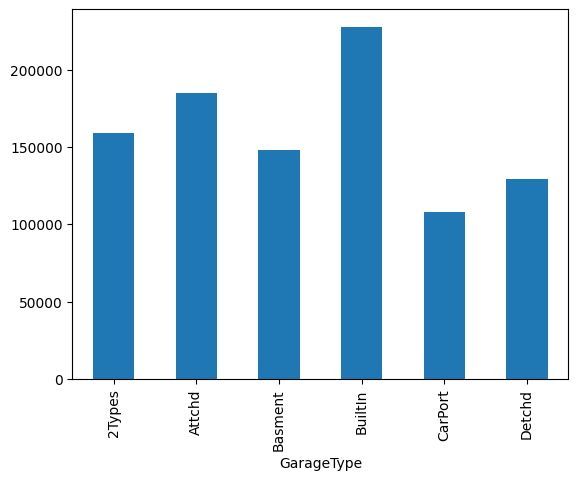

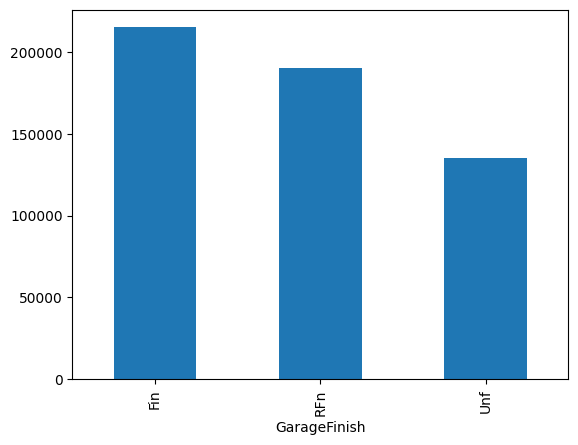

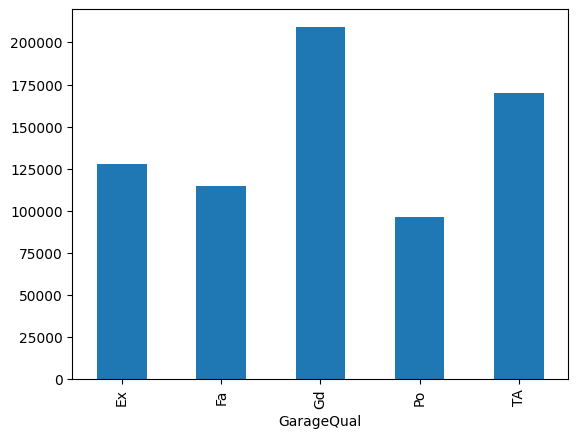

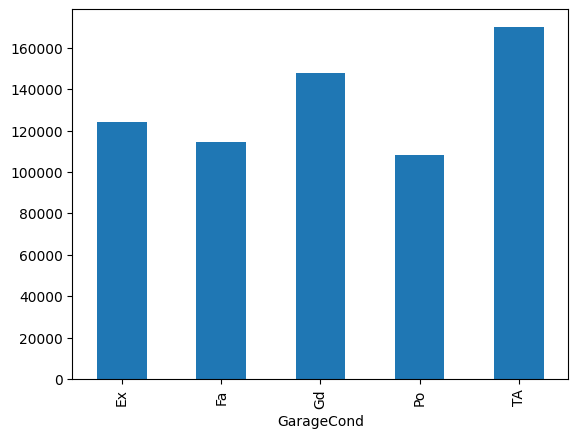

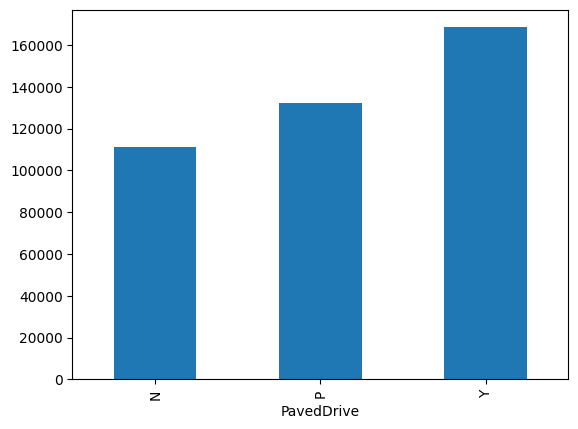

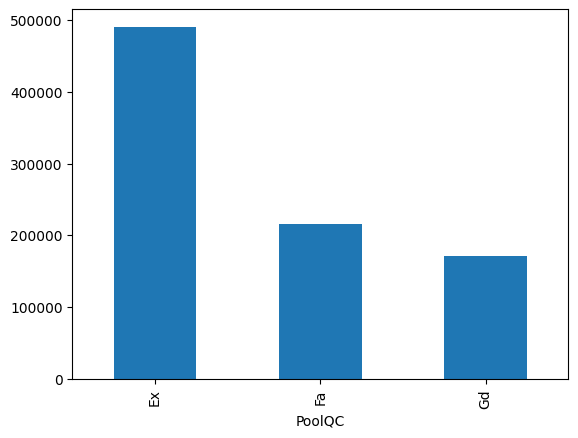

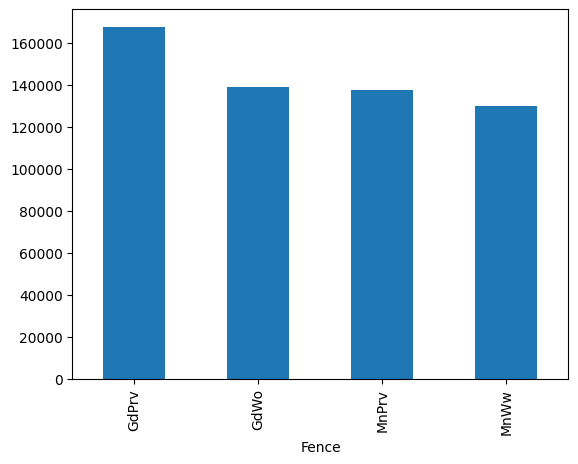

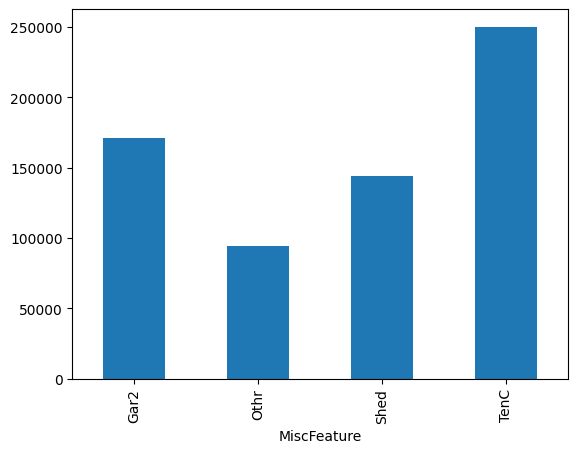

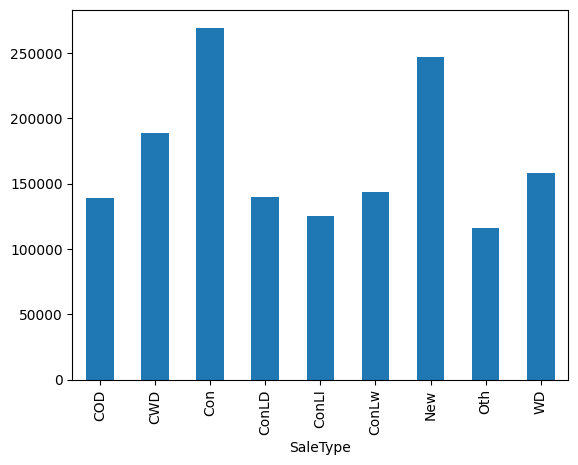

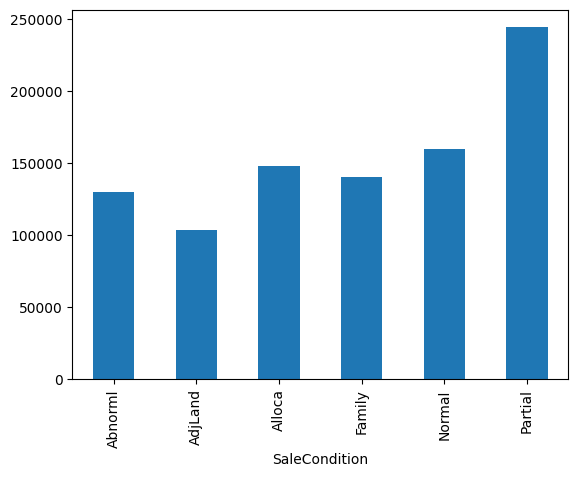

In [ ]:
for col in cat:
  dat = df_train.copy()
  dat.groupby(col)['SalePrice'].median().plot.bar()
  plt.xlabel(col)
  plt.show()

Feature Engineering
a) Handling missing values

In [ ]:
feat_miss

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
#looking at the categorical variables with missing values
cat_msy = [col for col in feat_miss if col in cat]
cat_msy

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
for col in cat_msy:
  print('{} has {} missing values'.format(col, np.round(df_train[col].isnull().mean(), 4)))

Alley has 0.9377 missing values
MasVnrType has 0.0055 missing values
BsmtQual has 0.0253 missing values
BsmtCond has 0.0253 missing values
BsmtExposure has 0.026 missing values
BsmtFinType1 has 0.0253 missing values
BsmtFinType2 has 0.026 missing values
Electrical has 0.0007 missing values
FireplaceQu has 0.4726 missing values
GarageType has 0.0555 missing values
GarageFinish has 0.0555 missing values
GarageQual has 0.0555 missing values
GarageCond has 0.0555 missing values
PoolQC has 0.9952 missing values
Fence has 0.8075 missing values
MiscFeature has 0.963 missing values


In [ ]:
df1 = df_train.copy()


In [ ]:
for col in cat_msy:
  df1[col] = df1[col].fillna('missing')

In [ ]:
#numericals with missing values
num_msy = [col for col in feat_miss if col not in cat]
num_msy

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
for col in num_msy:
  df1[col] = df1[col].fillna(df1[col].median())

In [ ]:
df1.isnull().sum().sum()

0

In [ ]:
year_col

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
#engineering year columns
for col in year_col:
  if col != 'YrSold':
    df1[col] = df1['YrSold'] - df1[col]

In [ ]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,12,2008,WD,Normal,250000


In [ ]:
yr = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

In [ ]:
df1[yr].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
Id,,,
1,5,5,5.0
2,31,31,31.0
3,7,6,7.0
4,91,36,8.0
5,8,8,8.0


In [ ]:
df1.to_csv('df_fe.csv')

Transforming skewed numerical features

In [ ]:
!gdown 1uKwyQorTl94VaG3WXbWfmYjuGKpUOa7Z

Downloading...
From: https://drive.google.com/uc?id=1uKwyQorTl94VaG3WXbWfmYjuGKpUOa7Z
To: /content/df_fe.csv
100% 493k/493k [00:00<00:00, 20.3MB/s]


In [ ]:
df_fe =pd.read_csv('df_fe.csv')

In [ ]:
'MSSubClass',
 'LotFrontage',
 'LotArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',

In [ ]:
numl = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

In [ ]:
df = df_fe.copy()

In [ ]:
df[numl].head()

,LotFrontage,LotArea,1stFlrSF,GrLivArea
0,65.0,8450,856,1710
1,80.0,9600,1262,1262
2,68.0,11250,920,1786
3,60.0,9550,961,1717
4,84.0,14260,1145,2198


In [ ]:
for col in numl:
  df[col] = np.log(df[col])

In [ ]:
df[numl].head()

,LotFrontage,LotArea,1stFlrSF,GrLivArea
0,4.174387,9.041922,6.752270,7.444249
1,4.382027,9.169518,7.140453,7.140453
2,4.219508,9.328123,6.824374,7.487734
3,4.094345,9.164296,6.867974,7.448334
4,4.430817,9.565214,7.043160,7.695303


Handling Rare Categoricals

In [ ]:
cat = df.select_dtypes('object').columns
cat

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
for col in cat:
  dm = df.copy()
  temp = df.groupby(col)['SalePrice'].count()/len(df)
  temp_df = temp[temp>0.01].index
  df[col] = np.where(df[col].isin(temp_df), df[col], 'Rare_var')

In [ ]:
dm = df_fe.copy()

In [ ]:
df.to_csv('df_fe2.csv',index=False)


feature scaling

In [ ]:
dmm = df.copy()

In [ ]:
scaler = MinMaxScaler()

In [ ]:
num = df.select_dtypes([int, float]).columns

In [ ]:
num

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
scal_f = [col for col in num if col not in ['Id', 'SalePrice']]


In [ ]:
scaler.fit(dmm[scal_f])

MinMaxScaler()

In [ ]:
scaled_df = pd.DataFrame(scaler.transform(dmm[scal_f]), columns=scal_f)

In [ ]:
scaled_df.shape

(1460, 36)

In [ ]:
scaled_df.to_csv('scaled_df.csv', index=False)

Correlations

In [7]:
!gdown 1ZBOBu6tzjf6R1GmUJDd-3DGeivZ4vJwL
#scaled df can be found here
!gdown 1wPCquuX8D6wwQd53s_rjdbPgYny726vy

Downloading...
From: https://drive.google.com/uc?id=1ZBOBu6tzjf6R1GmUJDd-3DGeivZ4vJwL
To: /content/df_fe2.csv
100% 569k/569k [00:00<00:00, 5.76MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wPCquuX8D6wwQd53s_rjdbPgYny726vy
To: /content/scaled_df.csv
100% 633k/633k [00:00<00:00, 6.18MB/s]


In [ ]:
df = pd.read_csv('df_fe2.csv')

In [ ]:
scaly = pd.read_csv('scaled_df.csv')

In [ ]:
mm =df[scal_f].corrwith(df['SalePrice']).abs().sort_values(ascending=False)

In [ ]:
rt = pd.DataFrame(mm)

In [ ]:
rt.rename(columns ={0:'mm'},inplace =True)

In [ ]:
cr_abv = rt[rt['mm']>0.4]

In [ ]:
cr_abv

,mm
OverallQual,0.790982
GrLivArea,0.695118
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.591264
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.523350
YearRemodAdd,0.509079


In [ ]:
cr_abv.index

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'GarageYrBlt', 'Fireplaces'],
      dtype='object')

In [ ]:
ww= ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'GarageYrBlt', 'Fireplaces']

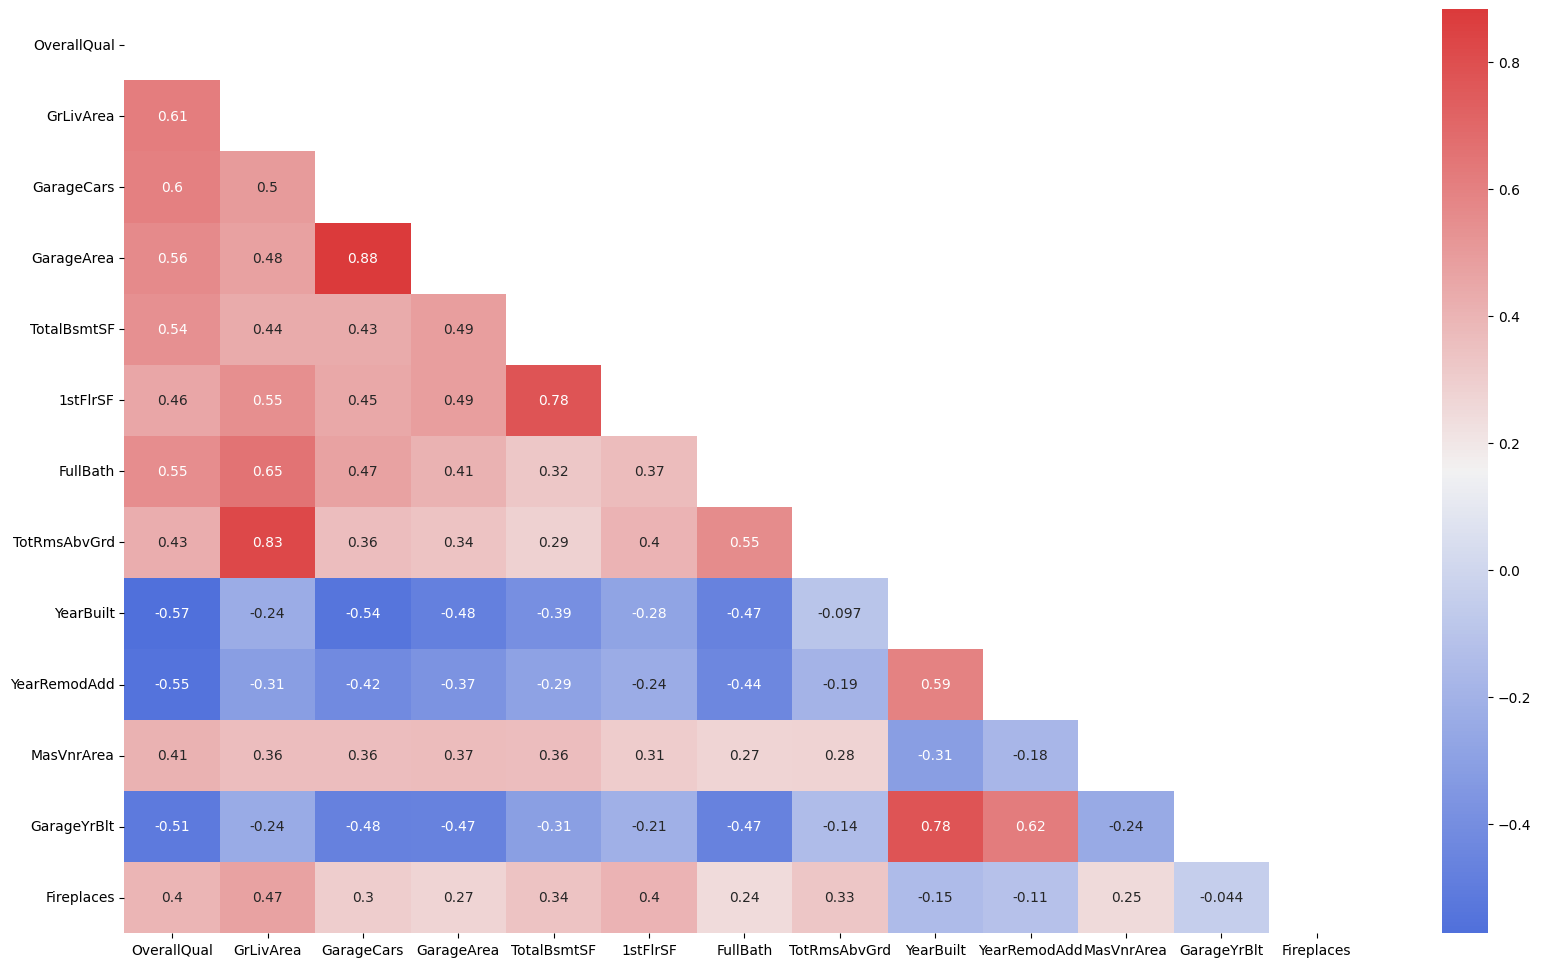

In [ ]:
from seaborn.widgets import diverging_palette
corr_mat = df[ww].corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize =(20, 12))
cmap = sns.diverging_palette(260,12, as_cmap = True)
sns.heatmap(corr_mat, cmap =cmap, annot = True, mask =mask)
plt.show()

Feature Selection

In [ ]:
scaly.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.418208,0.366344,0.666667,0.500,0.036765,0.098361,0.12250,0.125089,0.0,0.064212,0.140098,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.046729,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,0.000000,0.495064,0.391317,0.555556,0.875,0.227941,0.524590,0.00000,0.173281,0.0,0.121575,0.206547,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.289720,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,0.235294,0.434909,0.422359,0.666667,0.500,0.051471,0.114754,0.10125,0.086109,0.0,0.185788,0.150573,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.065421,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,0.294118,0.388581,0.390295,0.666667,0.500,0.669118,0.606557,0.00000,0.038271,0.0,0.231164,0.123732,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.074766,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00
4,0.235294,0.513123,0.468761,0.777778,0.500,0.058824,0.147541,0.21875,0.116052,0.0,0.209760,0.187398,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.074766,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50


In [ ]:
df_f = pd.concat([df['SalePrice'], scaly],axis = 1)
df_f.head()

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,208500,0.235294,0.418208,0.366344,0.666667,0.500,0.036765,0.098361,0.12250,0.125089,0.0,0.064212,0.140098,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.046729,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,181500,0.000000,0.495064,0.391317,0.555556,0.875,0.227941,0.524590,0.00000,0.173281,0.0,0.121575,0.206547,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.289720,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,223500,0.235294,0.434909,0.422359,0.666667,0.500,0.051471,0.114754,0.10125,0.086109,0.0,0.185788,0.150573,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.065421,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,140000,0.294118,0.388581,0.390295,0.666667,0.500,0.669118,0.606557,0.00000,0.038271,0.0,0.231164,0.123732,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.074766,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00
4,250000,0.235294,0.513123,0.468761,0.777778,0.500,0.058824,0.147541,0.21875,0.116052,0.0,0.209760,0.187398,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.074766,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50


In [ ]:
y_train = df_f['SalePrice']
x_train = df_f.drop(['SalePrice'],axis =1)

In [ ]:
feat_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feat_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
feat_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

One hot encoding categorical features

In [ ]:
cat = df.select_dtypes('object').columns
cat

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
len(cat)

43

In [ ]:
def make_onehot(multicolumns):
  dfc = df[cat].copy()
  i=0
  for col in multicolumns:
    #print(col)
    dk = pd.get_dummies(dfc[col],drop_first=True)
    #dfc.drop(col,axis=1, inplace=True)
    if i==0:
      df_final = dk.copy()
    else:
      df_final = pd.concat([df_final, dk],axis =1)
    i =i+1

  return df_final


In [ ]:
df_ohc = make_onehot(cat)
df_ohc.shape

(1460, 170)

In [ ]:
df_ohc.shape

(1460, 170)

In [ ]:
rty =df_ohc.loc[:,~df_ohc.columns.duplicated()]
rty.shape

(1460, 95)

In [ ]:
final_df = rty.copy()

In [ ]:
df_w_dup = df_ohc.copy() #onehot encoded dataframe with duplicates
df_no_dup =rty.copy()   # onehot encoded dataframe with no duplicates

In [ ]:
df_w_dup.to_csv('d_w_dup.csv')
df_no_dup.to_csv('d_no_dup.csv')

In [4]:
# Resume from the onehot encoded data frames
!gdown 1dcyXzkhIIzwXUHy1QoctpO4-Czb-CBuB
!gdown 1vEy3OVCimxBjK3QUCg6Eazqr5Bwhu6G0

Downloading...
From: https://drive.google.com/uc?id=1dcyXzkhIIzwXUHy1QoctpO4-Czb-CBuB
To: /content/d_w_dup.csv
100% 504k/504k [00:00<00:00, 5.19MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vEy3OVCimxBjK3QUCg6Eazqr5Bwhu6G0
To: /content/d_no_dup.csv
100% 284k/284k [00:00<00:00, 3.71MB/s]


In [8]:
odf = pd.read_csv('df_fe2.csv')
numy = pd.read_csv('scaled_df.csv')
catyy = pd.read_csv('d_no_dup.csv')

In [9]:
odf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,2,2008,WD,Normal,208500
1,2,20,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,5,2007,WD,Normal,181500
2,3,60,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,9,2008,WD,Normal,223500
3,4,70,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,12,2008,WD,Normal,250000


In [18]:
len(odf['Neighborhood'].unique())

23

In [15]:
df = pd.read_csv('train.csv')

In [19]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [10]:
rdf = pd.concat([odf['SalePrice'], numy, catyy],axis = 1)
rdf.head()

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Unnamed: 0,RH,RL,RM,Rare_var,Pave,missing,IR2,Reg,HLS,Low,Lvl,CulDSac,FR2,Inside,Mod,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Feedr,Norm,PosN,RRAn,2fmCon,Duplex,Twnhs,TwnhsE,1Story,2Story,SFoyer,SLvl,Hip,BrkFace,CemntBd,HdBoard,MetalSd,Plywood,Stucco,VinylSd,Wd Sdng,WdShing,CmentBd,Wd Shng,None,Stone,Gd,TA,CBlock,PConc,Slab,Fa,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,GasW,Y,FuseF,SBrkr,Min2,Typ,Po,Basment,BuiltIn,Detchd,RFn,P,GdWo,MnPrv,Shed,New,WD,Family,Normal,Partial
0,208500,0.235294,0.418208,0.366344,0.666667,0.500,0.036765,0.098361,0.12250,0.125089,0.0,0.064212,0.140098,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.046729,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
1,181500,0.000000,0.495064,0.391317,0.555556,0.875,0.227941,0.524590,0.00000,0.173281,0.0,0.121575,0.206547,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.289720,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
2,223500,0.235294,0.434909,0.422359,0.666667,0.500,0.051471,0.114754,0.10125,0.086109,0.0,0.185788,0.150573,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.065421,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,2,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,140000,0.294118,0.388581,0.390295,0.666667,0.500,0.669118,0.606557,0.00000,0.038271,0.0,0.231164,0.123732,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.074766,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,3,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,250000,0.235294,0.513123,0.468761,0.777778,0.500,0.058824,0.147541,0.21875,0.116052,0.0,0.209760,0.187398,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.074766,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,4,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [11]:
rdf.shape

(1460, 133)

In [ ]:

y = rdf['SalePrice']
x = rdf.drop(['SalePrice'],axis =1)

In [ ]:
feat_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feat_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
feat_sel_model.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

In [ ]:
regressor = LinearRegression()
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb.predict(x_test)

In [ ]:
rscore =r2_score(y_test, y_pred)
mscore = mean_absolute_error(y_test, y_pred)

In [ ]:
rscore

0.8576198654449448

In [ ]:
X = np.append(arr= np.ones((1460,1)).astype(int), values= x, axis =1)

In [ ]:
odf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,2,2008,WD,Normal,208500
1,2,20,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,5,2007,WD,Normal,181500
2,3,60,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,9,2008,WD,Normal,223500
3,4,70,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,12,2008,WD,Normal,250000


In [ ]:
tyr = odf[['LotShape', 'LandContour', 'Utilities']]

In [ ]:
 wt =pd.get_dummies(tyr,drop_first=True, prefix=['LotShape', 'LandContour', 'Utilities'])

In [ ]:
wt

,LotShape_IR2,LotShape_Rare_var,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_Rare_var
0,0,0,1,0,0,1,0
1,0,0,1,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
1455,0,0,1,0,0,1,0
1456,0,0,1,0,0,1,0
1457,0,0,1,0,0,1,0
1458,0,0,1,0,0,1,0


In [ ]:
watyy = pd.read_csv('d_w_dup.csv')

In [ ]:
watyy.columns

Index(['Unnamed: 0', 'RH', 'RL', 'RM', 'Rare_var', 'Rare_var.1', 'Pave',
       'missing', 'IR2', 'Rare_var.2',
       ...
       'missing.12', 'Shed', 'missing.13', 'New', 'Rare_var.28', 'WD',
       'Family', 'Normal', 'Partial', 'Rare_var.29'],
      dtype='object', length=171)